# Outlines for the House Pricing Regression Problem::
* [1.Problem Statement and Business Goal](#1)
* [2. Reading and Unerstanding the data](#2)
* [3.Exploraory Data Analysis](#3)
* [3.1 Year columns ](#3.1)
* [3.2 Discrete Columns](#3.2)
* [3.3 Continuous Columns](#3.3)
* [3.4 Categorical Columns](#3.4)
* [4. Missing Value Imputation](#4)
* [5. Distribution of the target variable](#5)
* [6. Data Preparation](#6)
* [7. Feature Selection](#7)
* [8. Model Building and Evaluation : Ridge and Lasso Regression](#8)
* [9. Model building with  double optimal alpha values for Ridge and Lasso Regression](#9)
* [10. Dropping the top5 variables from the lasso model and rebuilding the mode](#10)


## 1.Problem Statement and Business Goal <a id="1"></a>

A US-based housing company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.<br>
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
The company wants to know:<br>
- Which variables are significant in predicting the price of a house, and <br>
- How well those variables describe the price of a house. <br>

We shall model the price of houses with the available independent variables. This model will predict how the prices vary with the variables. So, the management can concentrate on areas that will yield high returns.Further, the model will be a good way for management to understand the pricing dynamics of a new market.

 

## 2. Reading and Understanding the data<a id="2"></a>

In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# reading the dataset
train=pd.read_csv("train.csv")
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [3]:
train.shape

(1460, 81)

In [4]:
# summary of the dataset: 1460 rows, 81 columns
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

## 3.  Explortory Data Analysis<a id="3"></a>

Ecah row represents the characteristic of a house/property.

In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
#How many columns with different datatypes are there?
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

int and float datatypes are part of numerical variables where as object datatype means categorical datatype. Let's look them one at a time:


In [7]:
train.MSSubClass.dtype

dtype('int64')

In [8]:
train.MSSubClass.value_counts(dropna= False)

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [9]:
## Zoning class are given in numerical; therefore converted to categorical variables. 
train['MSSubClass'] = train['MSSubClass'].astype(str)
train.MSSubClass.dtype

dtype('O')

### 3.1  Year columns <a id="3.1"></a>

In [10]:
yr_cols= ['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold']

In [11]:
for i in yr_cols:
    print(i,train[i].dtype)

YearBuilt int64
YearRemodAdd int64
GarageYrBlt float64
YrSold int64


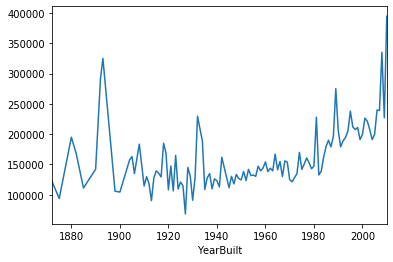

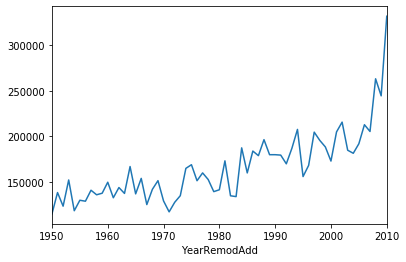

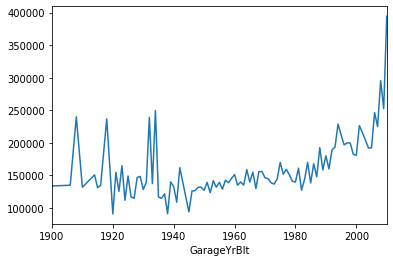

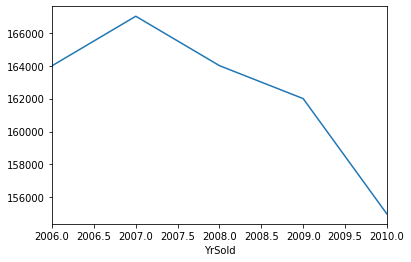

In [12]:
for i in yr_cols: 
    train.groupby(i)['SalePrice'].median().plot()
    plt.show()

Median SalePrice of the various year features donot depict any mnotable trend. Also, the money value itself has suffered due to inflation, market and other factors.

In [13]:
# Deriving new feature from the above yr_cols
train['age_house'] = 2020 - train['YearBuilt']
train['age_remod'] = 2020 - train['YearRemodAdd']
train['age_garage'] = 2020- train['GarageYrBlt']
train['age_sold'] = 2020 - train['YrSold']

In [14]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age_house,age_remod,age_garage,age_sold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,17,17,17.0,12
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,44,44,44.0,13
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19,18,19.0,12
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,105,50,22.0,14
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,20,20,20.0,12


Leaving the yr_cols for now, will drop these later.

In [15]:
train.shape

(1460, 85)

In [16]:
# Separating the numeric data types into list

numeric_cols=train.columns[train.dtypes!=object]
print(numeric_cols)

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'age_house', 'age_remod', 'age_garage',
       'age_sold'],
      dtype='object')


### 3.2 Discrete Columns<a id="3.2"></a>

In [17]:
# For choosing the descrete features, we set the threshold value to 30
# W We have choosen only those features which have the number of unique values less than 30.
# And also which are not in the year_cols.
discrete_features = [i for i in numeric_cols if len(train[i].unique()) < 30 and i not in yr_cols]

print('Number of discrete features : {}\n'.format(len(discrete_features)))

discrete_features

Number of discrete features : 17



['OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'age_sold']

#### Relationship of the discrete features with SalePrice¶

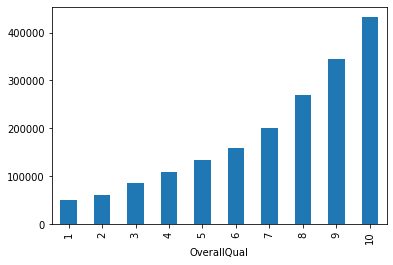

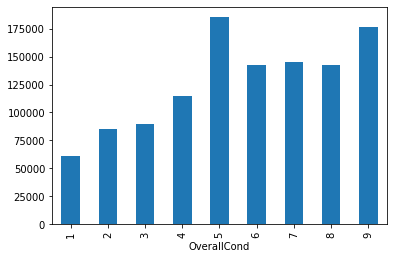

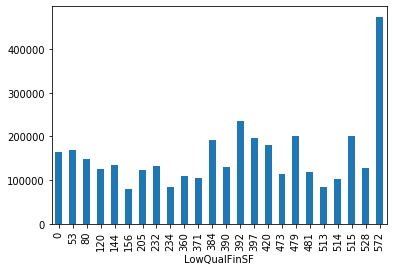

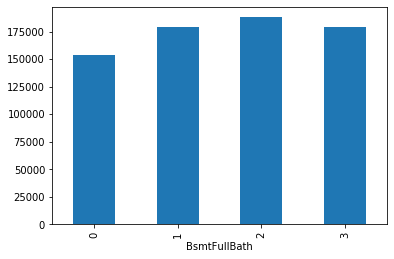

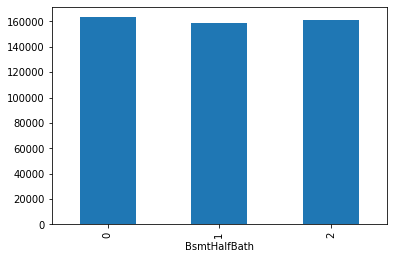

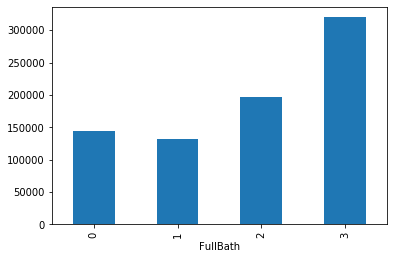

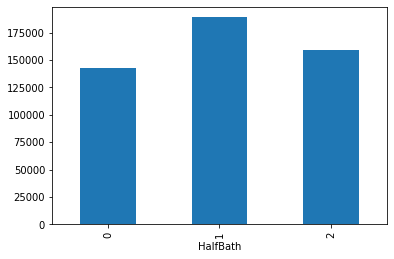

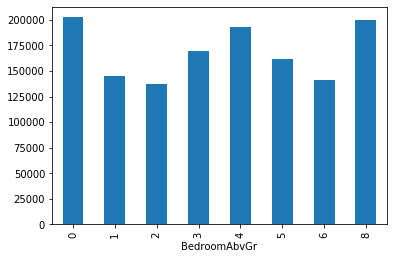

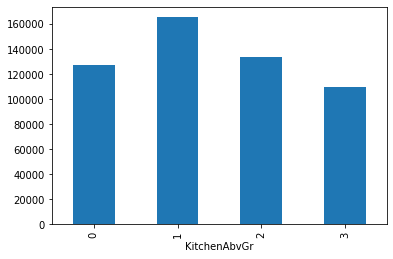

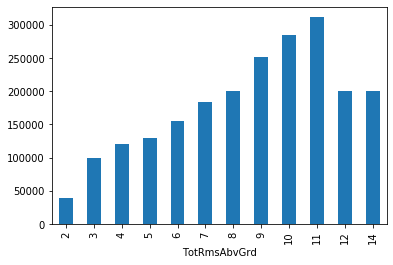

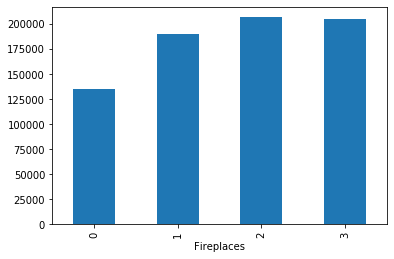

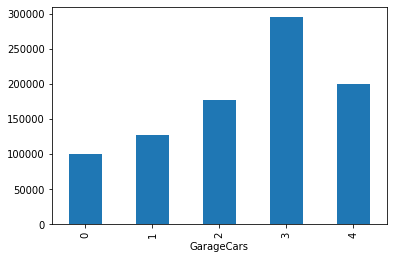

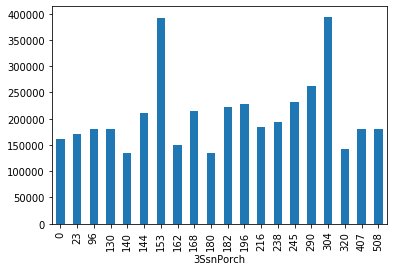

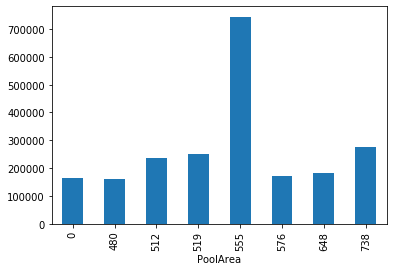

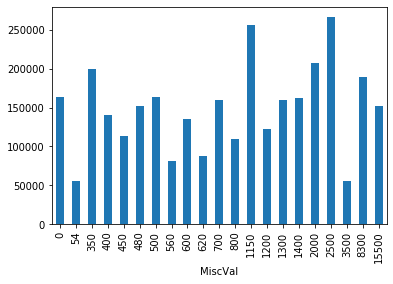

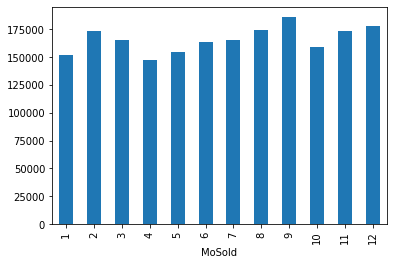

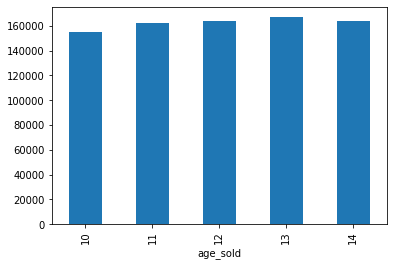

In [18]:
for i in discrete_features:
    train.groupby(i)['SalePrice'].median().plot.bar()
    
    plt.show()

`Conclusion`: Few of these are as follows::<br> 
As the OverQuality of the house increases the SalePrice tends to increase.<br>When  OverallCondition of the house is 5 its the costliest, else with increase in condition the house price tend to surge. <br>
Houses with 2 Basefull Bathrooms are costliest <br>
One Half Basement bathrooms are costlier among other counts. <br>

### 3.3  Continuous Columns <a id="3.3"></a>

In [19]:
# Numerical_features which aren't in descrete_features, year_features and Id column, are listed as Continuous Features
continuous_features = [i for i in numeric_cols if i not in discrete_features + yr_cols]

print('Number of continuous features : {}\n'.format(len(continuous_features)))

continuous_features

Number of continuous features : 20



['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice',
 'age_house',
 'age_remod',
 'age_garage']

### Distribution of the continuous columns

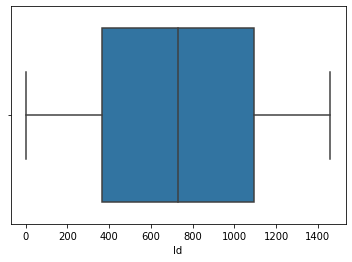

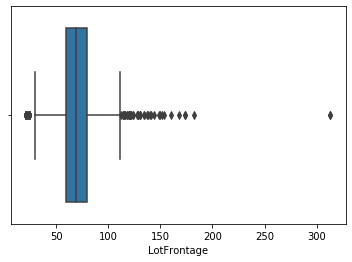

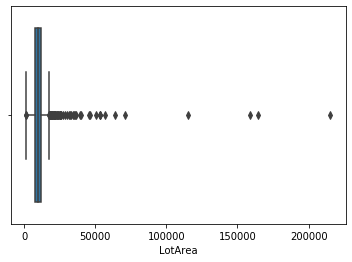

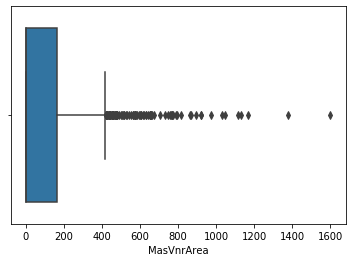

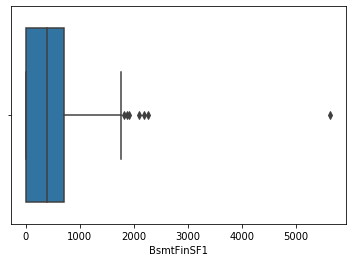

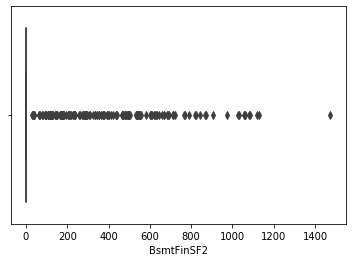

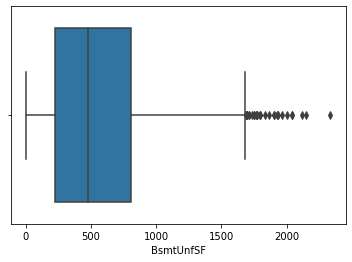

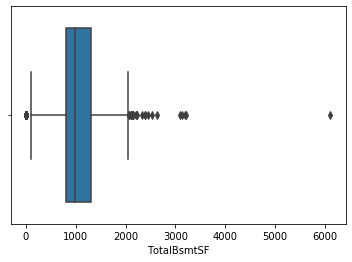

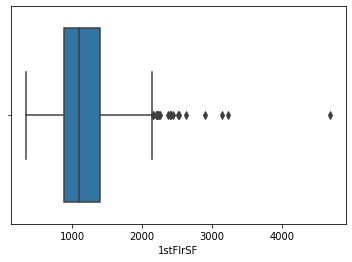

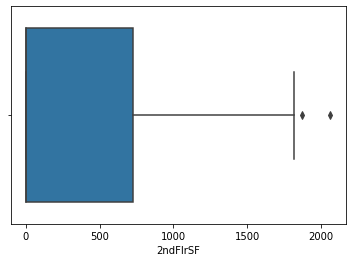

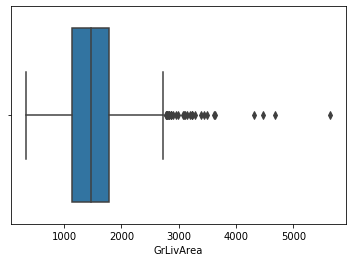

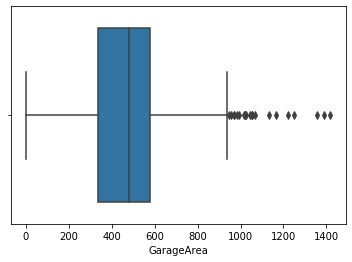

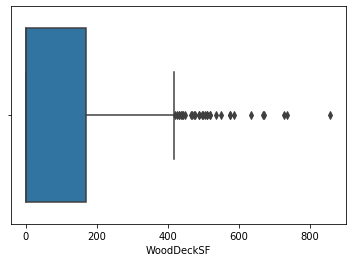

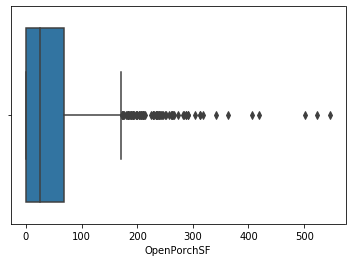

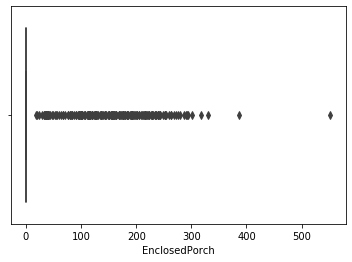

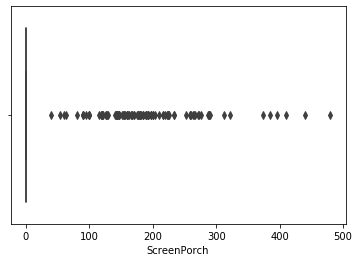

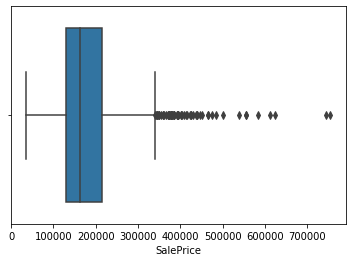

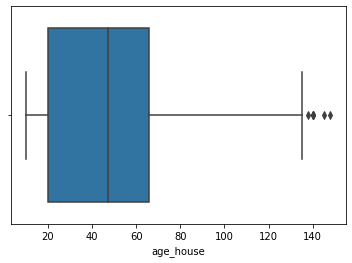

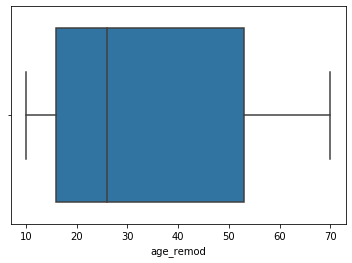

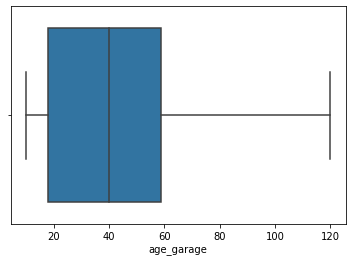

In [20]:
for i in continuous_features:
    #train[i].hist(bins= 25)
    sns.boxplot(train[i])
    plt.xlabel(i)
    plt.show()

In [21]:
continuous_features.remove("SalePrice")
for i in continuous_features:
    percentiles = train[i].quantile([0.05,0.95]).values
    train[i][train[i] <= percentiles[0]] = percentiles[0]
    train[i][train[i] >= percentiles[1]] = percentiles[1]
    

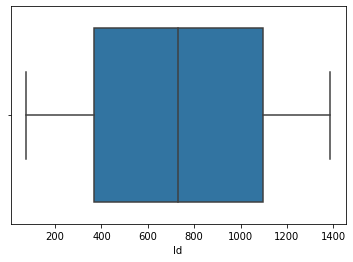

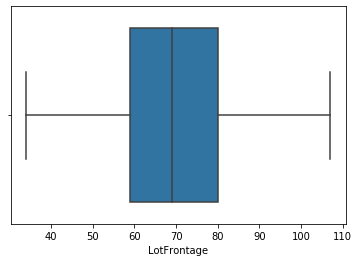

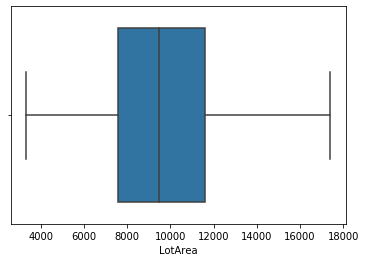

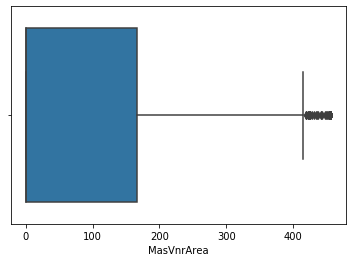

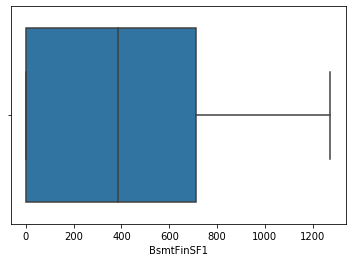

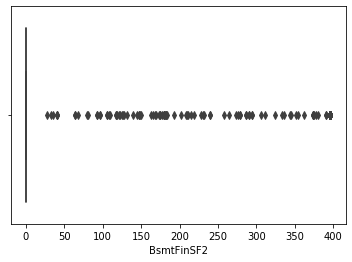

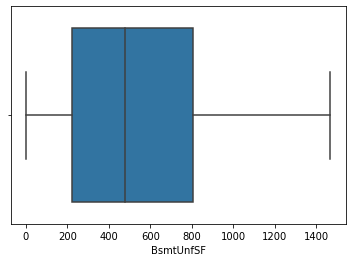

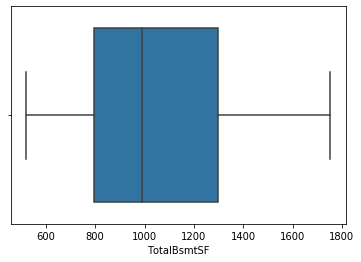

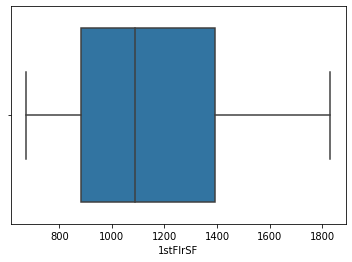

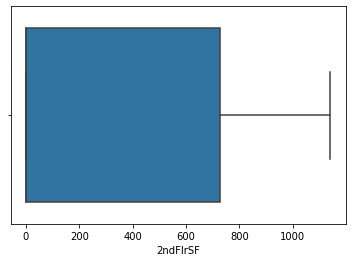

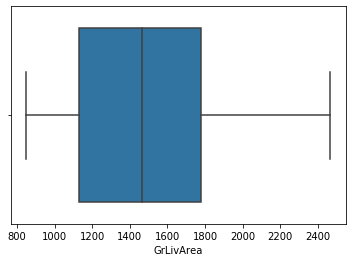

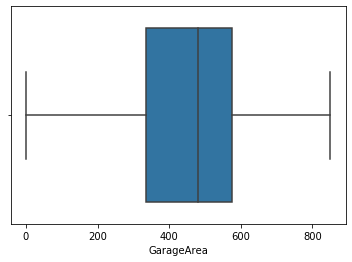

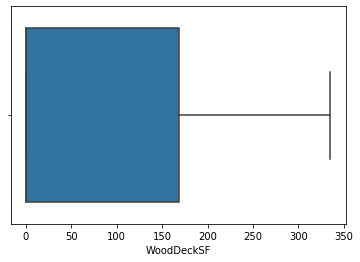

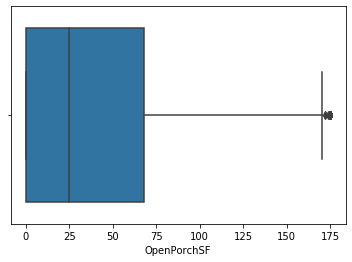

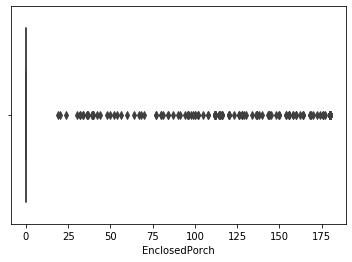

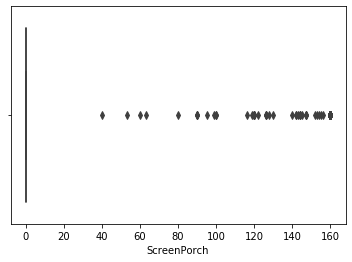

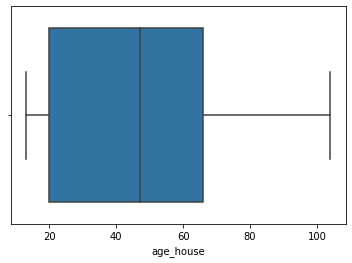

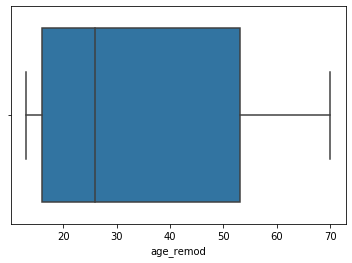

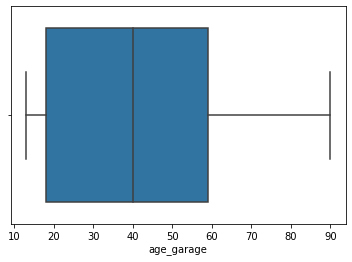

In [22]:
#again looking at the boxplots :
for i in continuous_features:
    #train[i].hist(bins= 25)
    sns.boxplot(train[i])
    plt.xlabel(i)
    plt.show()

In [23]:
train[numeric_cols].head(2)

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,age_house,age_remod,age_garage,age_sold
0,73.95,65.0,8450.0,7,5,2003,2003,196.0,706,0.0,150,856.0,856.0,854.0,0,1710.0,1,0,2,1,3,1,8,0,2003.0,2,548.0,0,61.0,0.0,0,0,0,0,2,2008,208500,17,17,17.0,12
1,73.95,80.0,9600.0,6,8,1976,1976,0.0,978,0.0,284,1262.0,1262.0,0.0,0,1262.0,0,1,2,0,3,1,6,1,1976.0,2,460.0,298,0.0,0.0,0,0,0,0,5,2007,181500,44,44,44.0,13


In [24]:
# Let's look at the correlation coefficient w.r.t SalePrice 
sp_corr= train.corr()["SalePrice"].sort_values(ascending=False)[1:].to_frame()
sp_corr.columns= ['Correlation_Value']
sp_corr['abs_corr']= abs(sp_corr.Correlation_Value)
sp_corr.sort_values('abs_corr', ascending=False)[:20]

,Correlation_Value,abs_corr
OverallQual,0.790982,0.790982
GrLivArea,0.696737,0.696737
GarageCars,0.640409,0.640409
GarageArea,0.630198,0.630198
TotalBsmtSF,0.626933,0.626933
1stFlrSF,0.602109,0.602109
FullBath,0.560664,0.560664
age_house,-0.537470,0.537470
TotRmsAbvGrd,0.533723,0.533723
YearBuilt,0.522897,0.522897


Above are the top 15 highly correlated columns with the target variable.

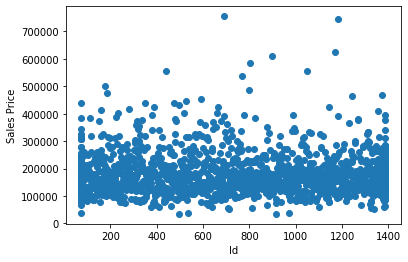

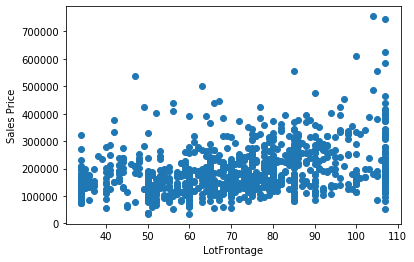

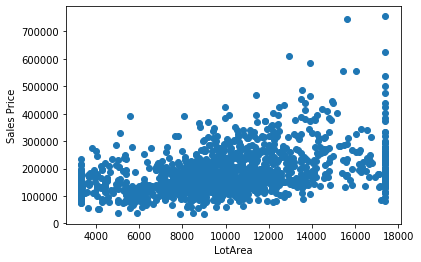

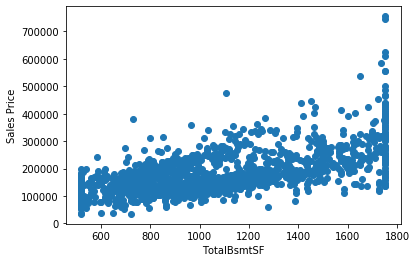

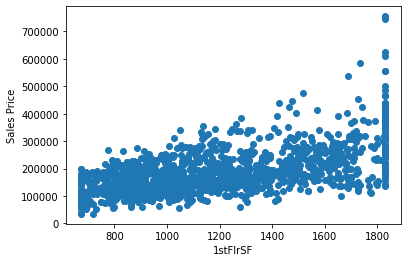

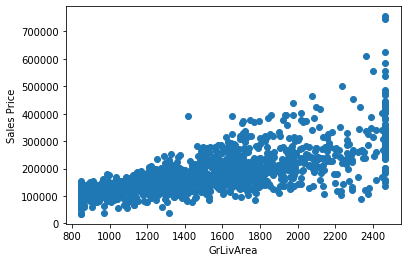

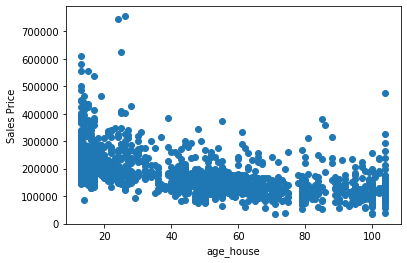

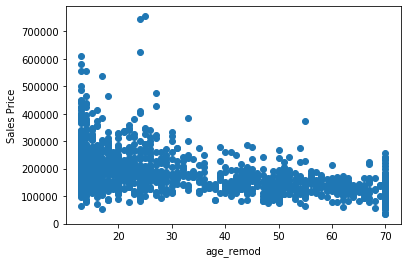

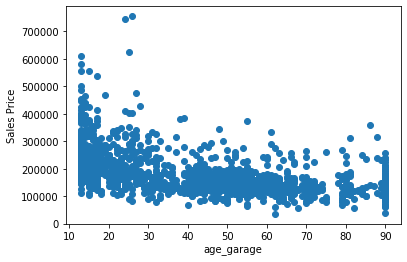

In [25]:
for feature in continuous_features:
    if 0 in train[feature].unique():
        pass
    else:
        plt.scatter(train[feature], train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sales Price')
        plt.show()

`Conclusion`: It can be seen that as the overall Quality of the building increases there is broader SalePrice bracket with higher median value.

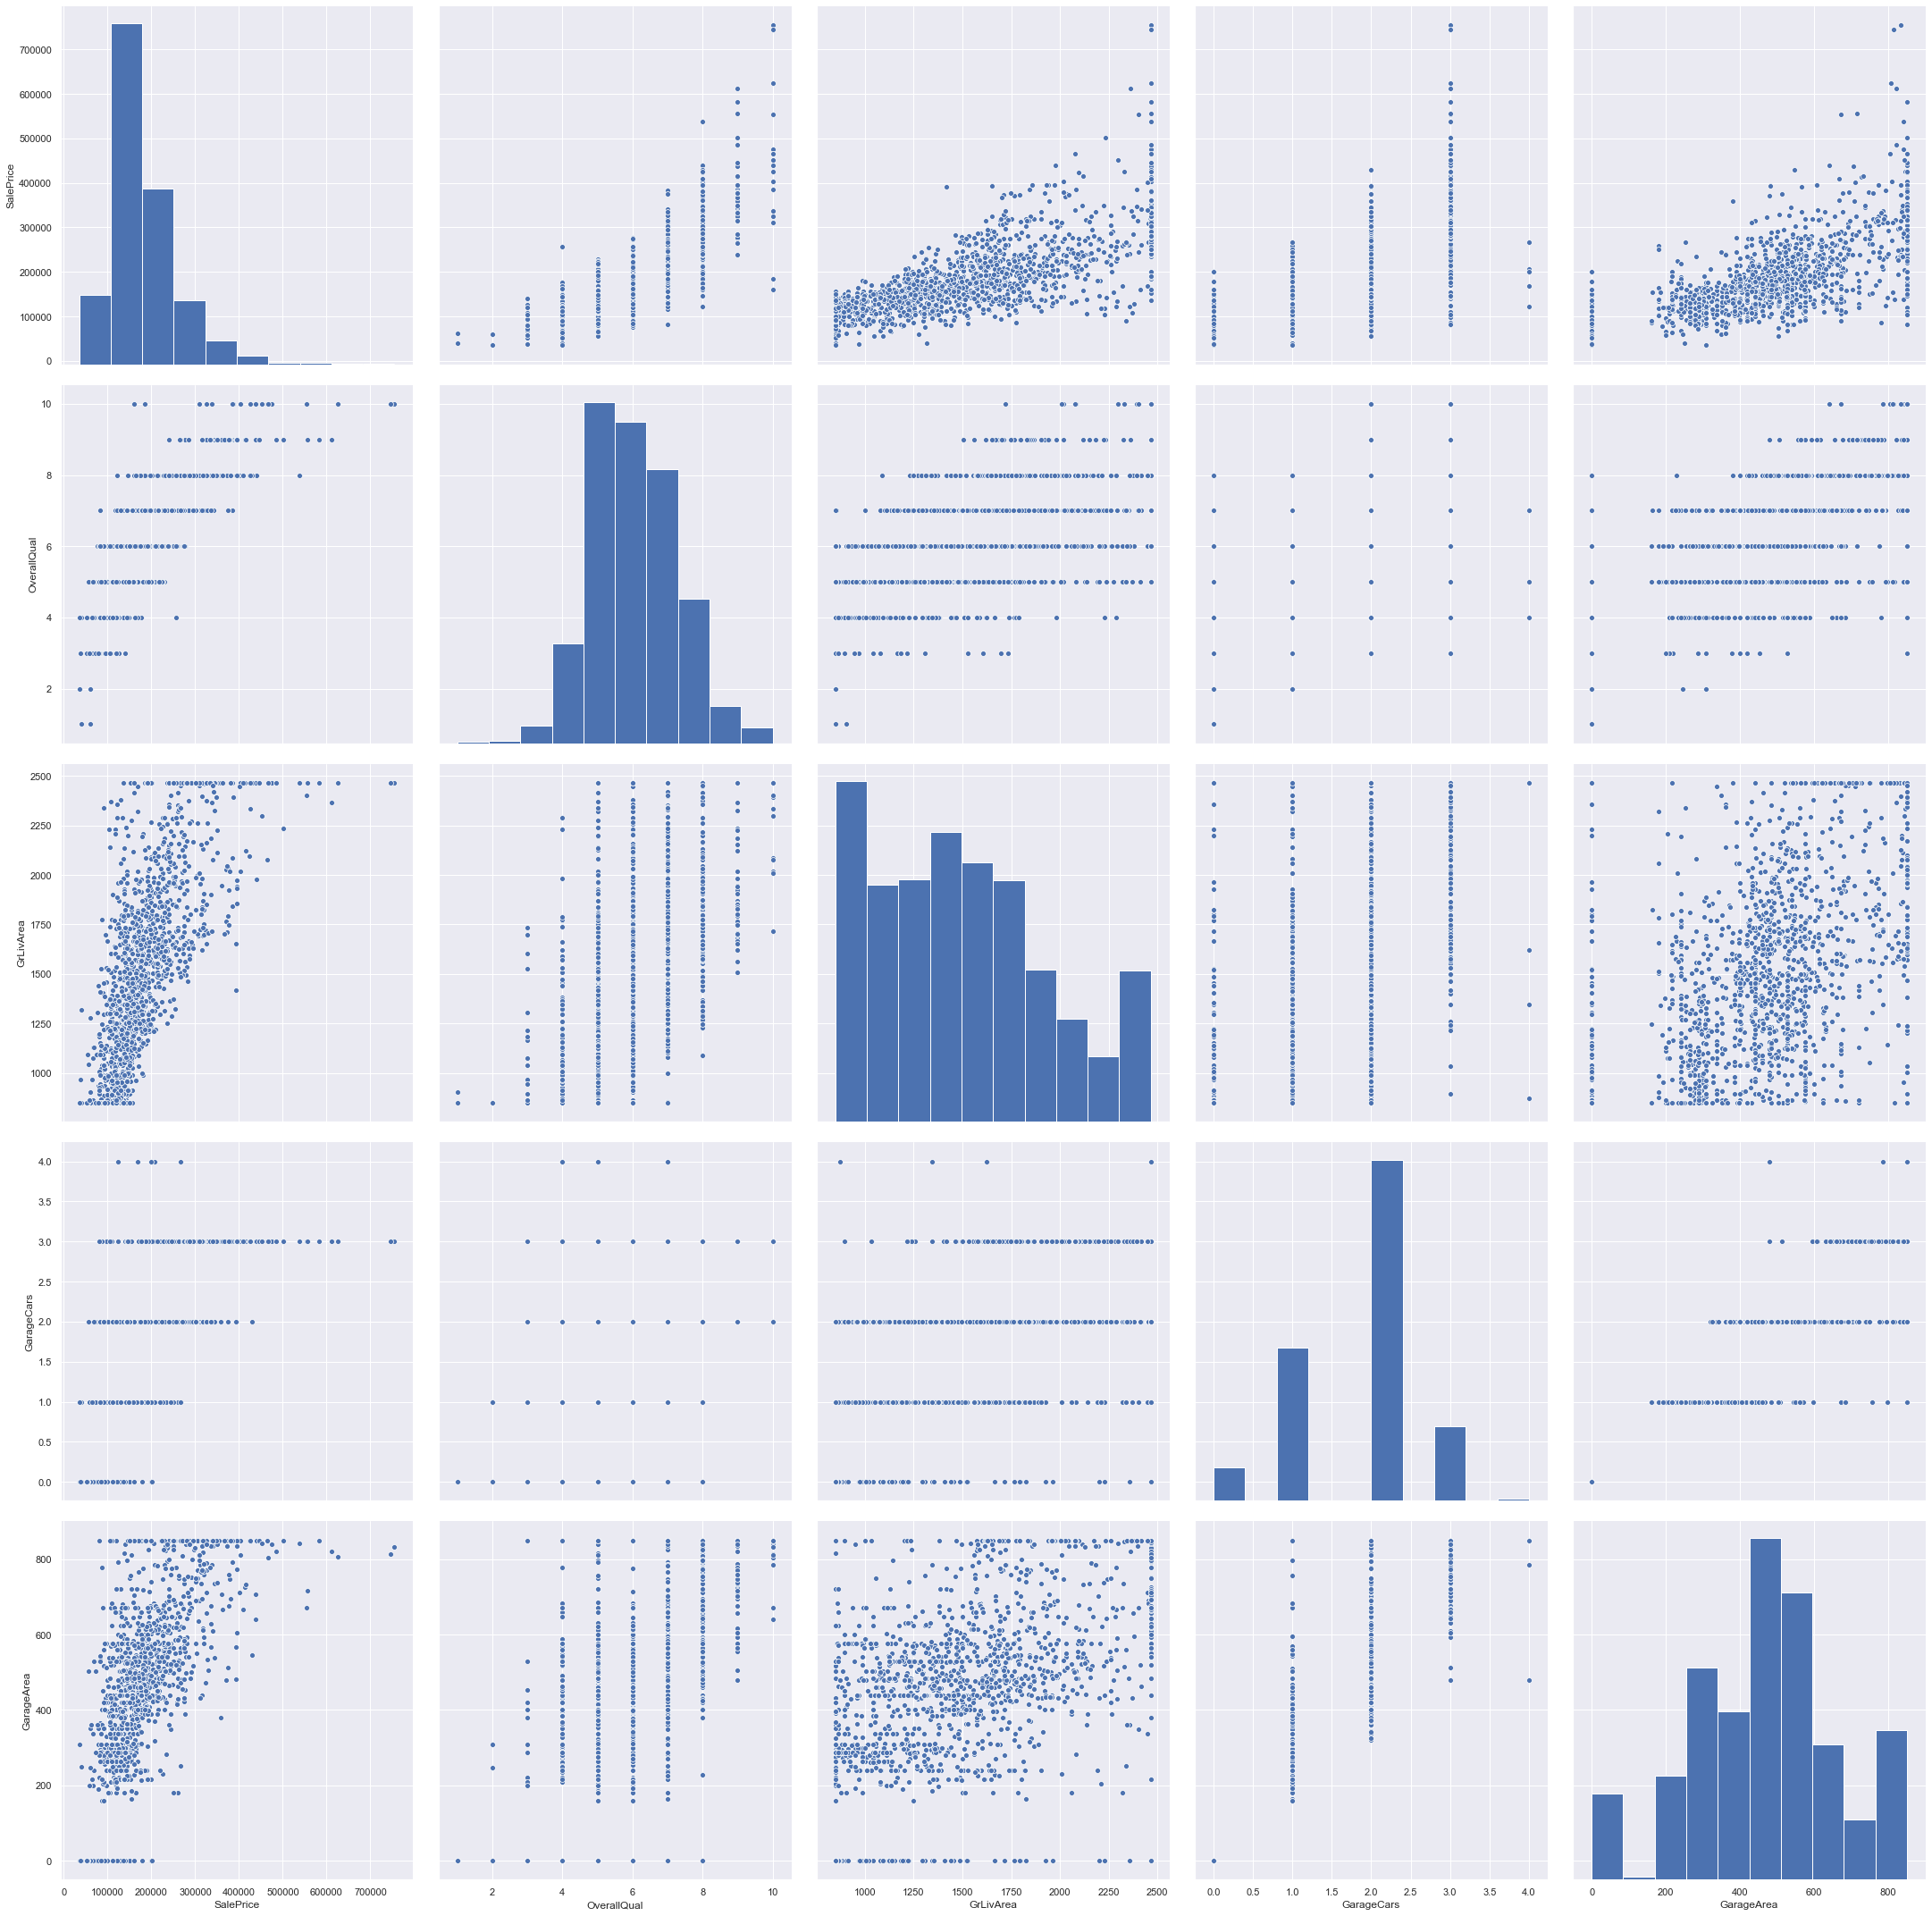

In [26]:
#pairplots
sns.set()
cols_1=['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']
sns.pairplot(train[cols_1], size = 6)
plt.show();

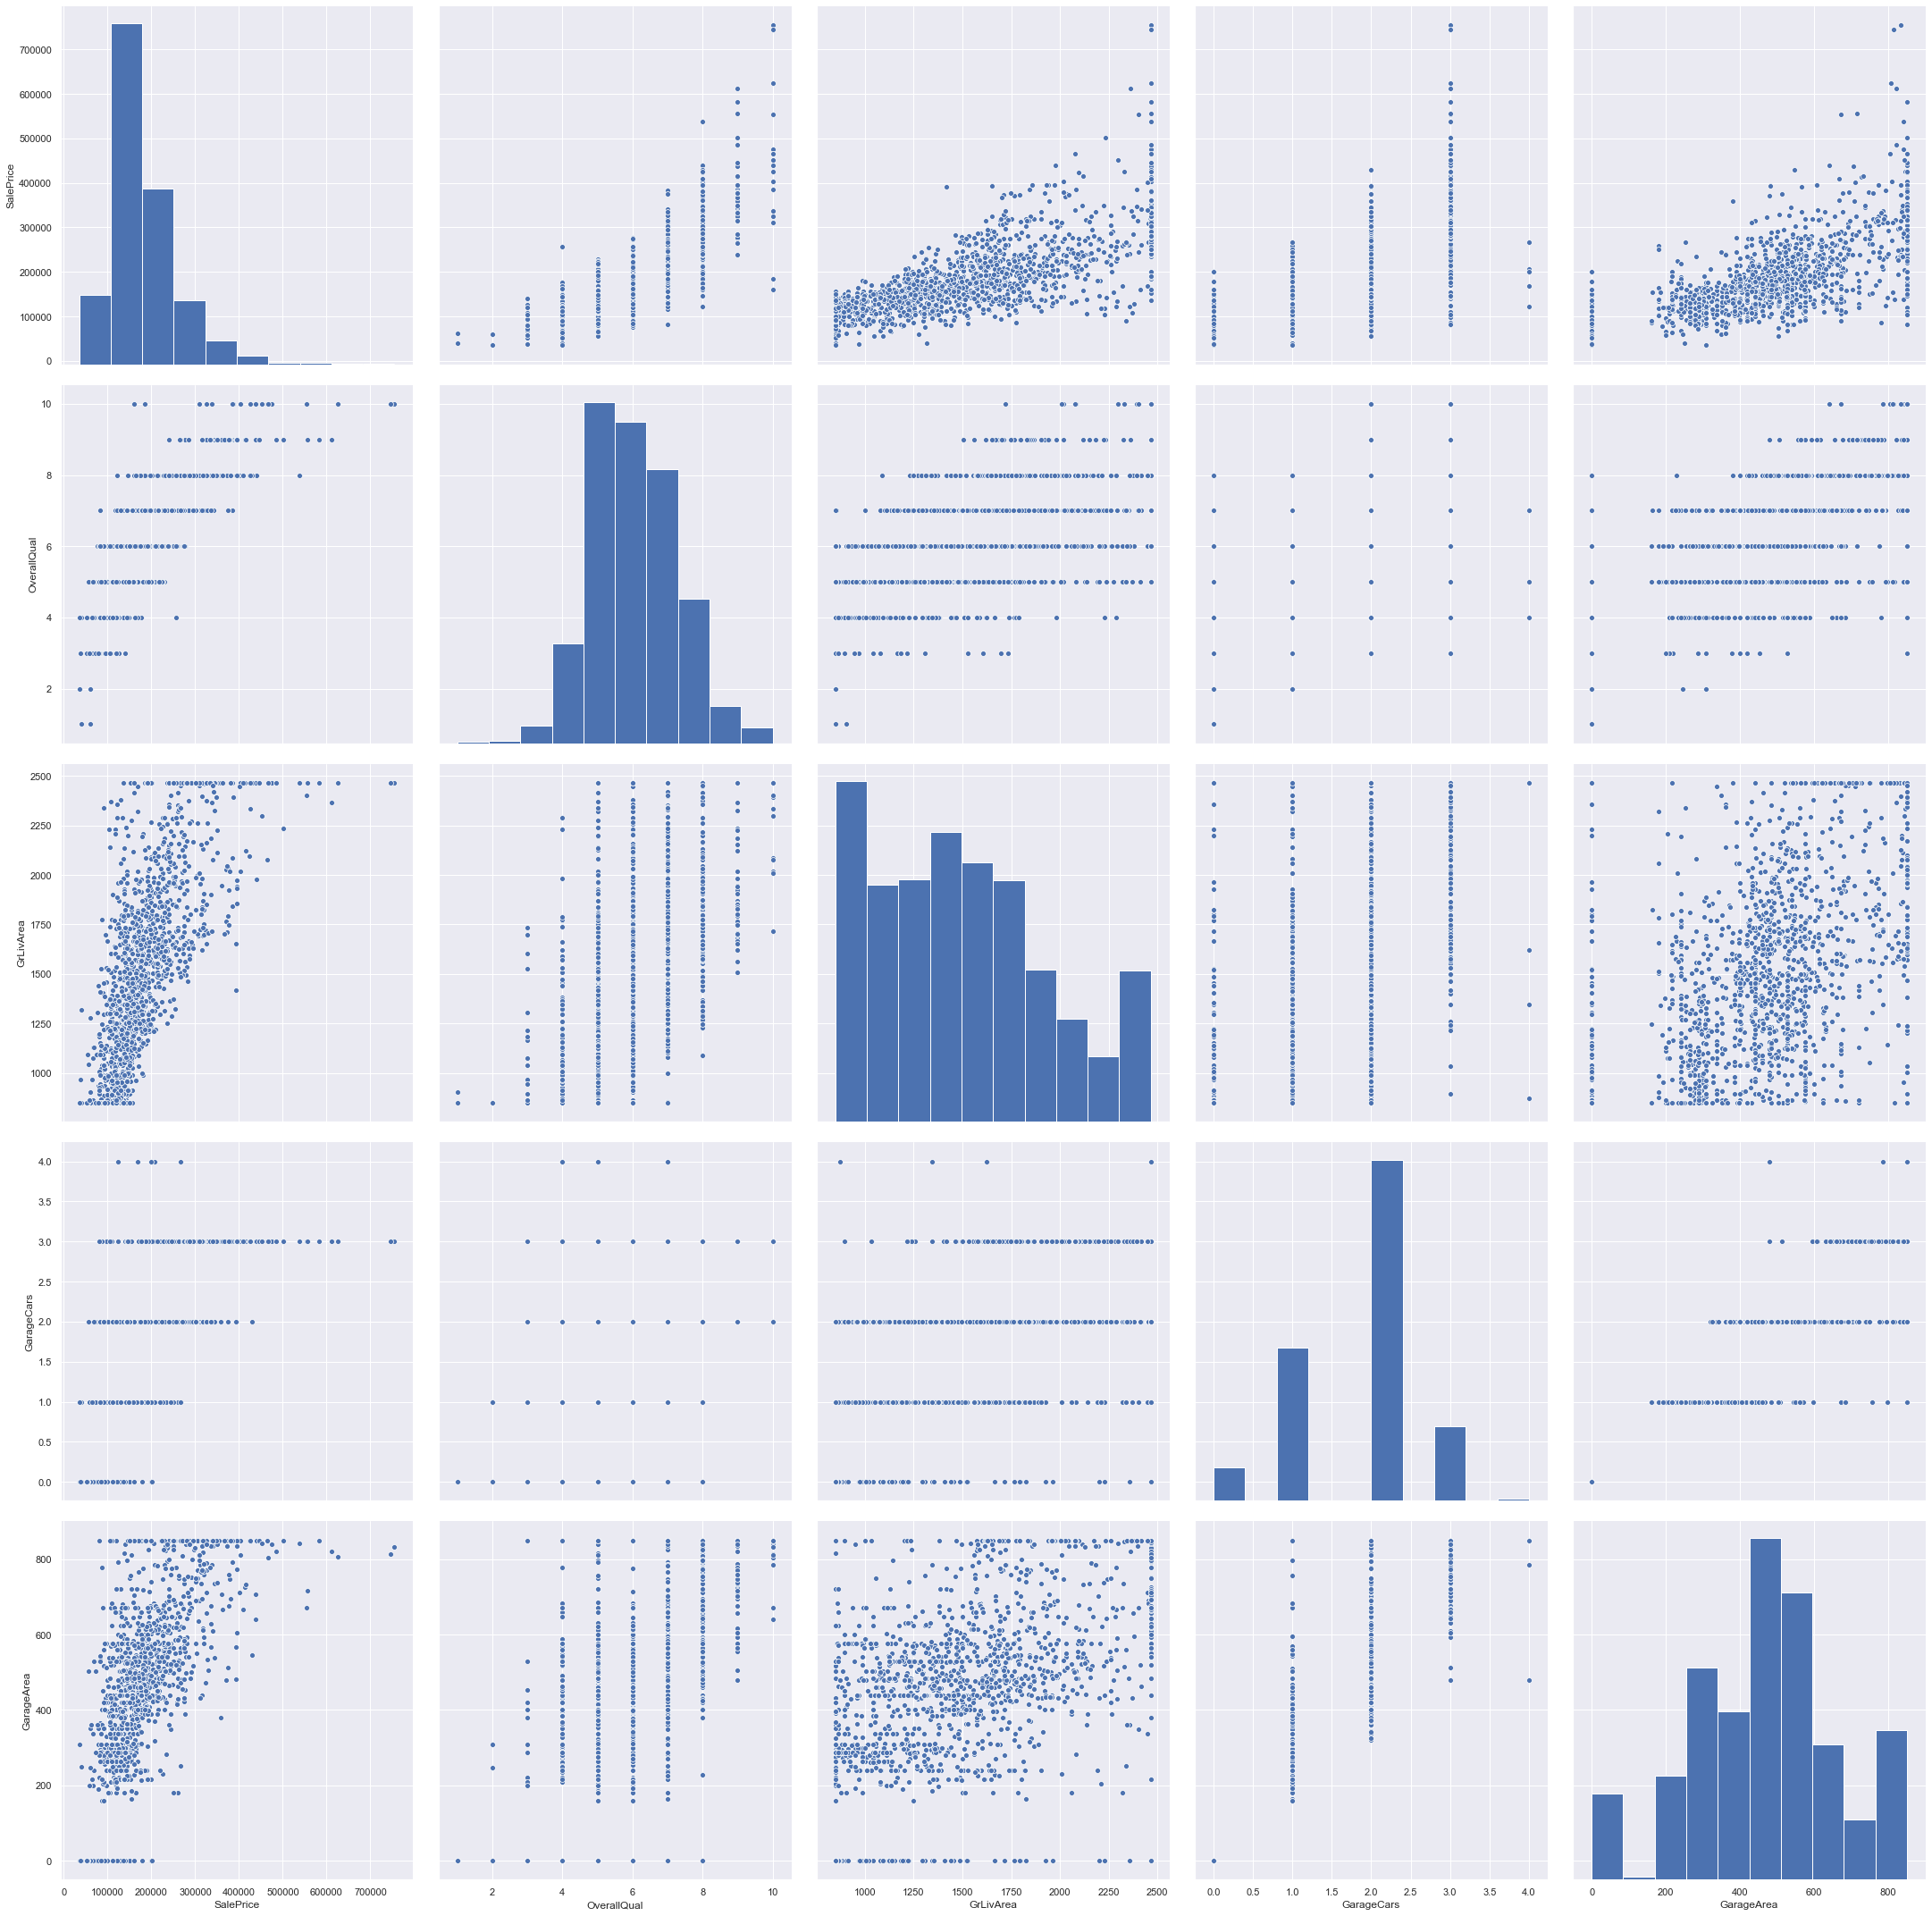

In [27]:
#pairplots
sns.set()
ccols_2= ['SalePrice','TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'age_house']
sns.pairplot(train[cols_1], size = 6)
plt.show();


In [28]:
def fun_heatmap_plot(corr_matrix):
    sns.set(font_scale=0.7)
    plt.figure(figsize=(20,15))
    ax = sns.heatmap(corr_matrix,cmap=sns.diverging_palette(20, 120, n=100),linewidths=.1,square=True, annot=True)
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=90,horizontalalignment='right')
    bottom, top=ax.get_ylim()
    ax.set_ylim(bottom+0.5, top-0.5);   

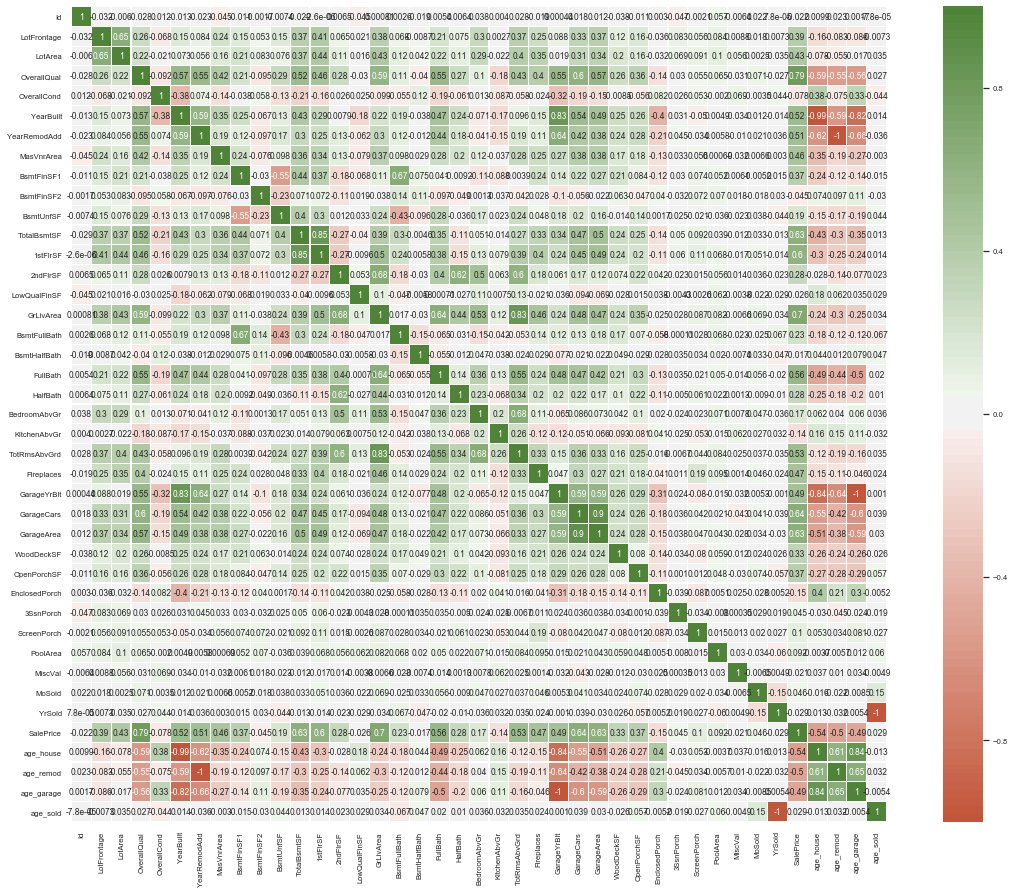

In [29]:
fun_heatmap_plot(train.corr())

In [30]:
corr_matrix_1=train[numeric_cols].corr()

np.ones(corr_matrix_1.shape)
np.triu(np.ones(corr_matrix_1.shape),k=0)
corr_matrix_1=corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape),k=1).astype(np.bool))
CM_1=corr_matrix_1.unstack().reset_index()
CM_1.columns= ['VAR1','VAR2','Correlation']
CM_1=CM_1.dropna(subset=['Correlation'])
CM_1=CM_1[CM_1.VAR1 != CM_1.VAR2]
CM_1.Correlation=abs(CM_1.Correlation)
CM_1.sort_values('Correlation',ascending=False)[:30]

,VAR1,VAR2,Correlation
1675,age_sold,YrSold,1.000000
1564,age_remod,YearRemodAdd,0.999863
1623,age_garage,GarageYrBlt,0.996123
1522,age_house,YearBuilt,0.993654
1091,GarageArea,GarageCars,0.896544
503,1stFlrSF,TotalBsmtSF,0.851291
1541,age_house,GarageYrBlt,0.844421
1636,age_garage,age_house,0.844185
917,TotRmsAbvGrd,GrLivArea,0.826293
989,GarageYrBlt,YearBuilt,0.825667


This shows multicollinearity. In regression, "multicollinearity" refers to features that are correlated with other features. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your target variable, but also to each other.

Problem:

Multicollinearity increases the standard errors of the coefficients. That means, multicollinearity makes some variables statistically insignificant when they should be significant.

### 3.4Categorical Columns <a id="3.4"></a>

In [31]:
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

print('\nNumber of categorical features : {}'.format(len(categorical_features)))
categorical_features


Number of categorical features : 44


['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [32]:
for i in categorical_features:
    print('Feature : {}\nUnique values : {}\nNumber of unique values : {}\n'.format(i, train[i].unique(), len(train[i].unique())))

Feature : MSSubClass
Unique values : ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
Number of unique values : 15

Feature : MSZoning
Unique values : ['RL' 'RM' 'C (all)' 'FV' 'RH']
Number of unique values : 5

Feature : Street
Unique values : ['Pave' 'Grvl']
Number of unique values : 2

Feature : Alley
Unique values : [nan 'Grvl' 'Pave']
Number of unique values : 3

Feature : LotShape
Unique values : ['Reg' 'IR1' 'IR2' 'IR3']
Number of unique values : 4

Feature : LandContour
Unique values : ['Lvl' 'Bnk' 'Low' 'HLS']
Number of unique values : 4

Feature : Utilities
Unique values : ['AllPub' 'NoSeWa']
Number of unique values : 2

Feature : LotConfig
Unique values : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Number of unique values : 5

Feature : LandSlope
Unique values : ['Gtl' 'Mod' 'Sev']
Number of unique values : 3

Feature : Neighborhood
Unique values : ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawye

### Categorical features 

In [33]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age_house,age_remod,age_garage,age_sold
0,73.95,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,150,856.0,GasA,Ex,Y,SBrkr,856.0,854.0,0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548.0,TA,TA,Y,0,61.0,0.00,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,17,17,17.0,12
1,73.95,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,284,1262.0,GasA,Ex,Y,SBrkr,1262.0,0.0,0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460.0,TA,TA,Y,298,0.0,0.00,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,44,44,44.0,13
2,73.95,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0.0,434,920.0,GasA,Ex,Y,SBrkr,920.0,866.0,0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608.0,TA,TA,Y,0,42.0,0.00,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,19,18,19.0,12
3,73.95,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0.0,540,756.0,GasA,Gd,Y,SBrkr,961.0,756.0,0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642.0,TA,TA,Y,0,35.0,180.15,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,104,50,22.0,14
4,73.95,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0.0,490,1145.0,GasA,Ex,Y,SBrkr,1145.0,1053.0,0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836.0,TA,TA,Y,192,84.0,0.00,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,20,20,20.0,12


In [34]:
for i in categorical_features:
    print('Feature : {}\nValue Count \n{} \n\n\n '.format(i,round(100* train[i].value_counts(dropna= False, ascending=False, normalize=True))))

Feature : MSSubClass
Value Count 
20     37.0
60     20.0
50     10.0
120     6.0
30      5.0
160     4.0
70      4.0
80      4.0
90      4.0
190     2.0
85      1.0
75      1.0
45      1.0
180     1.0
40      0.0
Name: MSSubClass, dtype: float64 


 
Feature : MSZoning
Value Count 
RL         79.0
RM         15.0
FV          4.0
RH          1.0
C (all)     1.0
Name: MSZoning, dtype: float64 


 
Feature : Street
Value Count 
Pave    100.0
Grvl      0.0
Name: Street, dtype: float64 


 
Feature : Alley
Value Count 
NaN     94.0
Grvl     3.0
Pave     3.0
Name: Alley, dtype: float64 


 
Feature : LotShape
Value Count 
Reg    63.0
IR1    33.0
IR2     3.0
IR3     1.0
Name: LotShape, dtype: float64 


 
Feature : LandContour
Value Count 
Lvl    90.0
Bnk     4.0
HLS     3.0
Low     2.0
Name: LandContour, dtype: float64 


 
Feature : Utilities
Value Count 
AllPub    100.0
NoSeWa      0.0
Name: Utilities, dtype: float64 


 
Feature : LotConfig
Value Count 
Inside     72.0
Corner     18.0
Cu

In [35]:
# Columns like Street, ,Utilities,etc are highly skewed, approx around 92%
cate_skewed_cols= ['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Functional', 'PavedDrive']
train.drop(cate_skewed_cols, inplace=True, axis=1)

In [36]:
#updating the list of categorical features
categorical_features = [feature for feature in train.columns if train[feature].dtype == 'O']

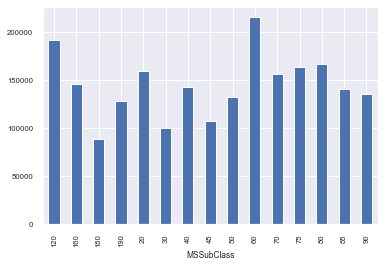

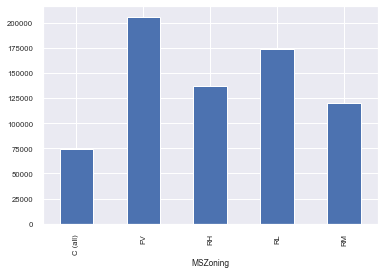

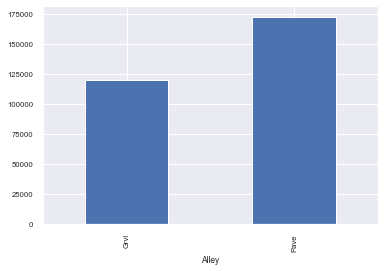

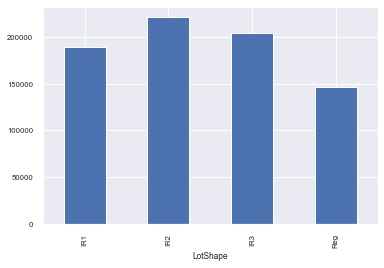

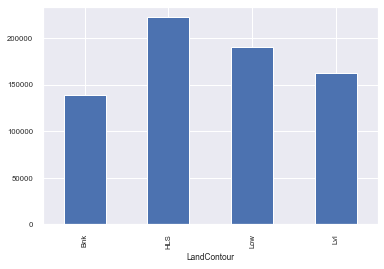

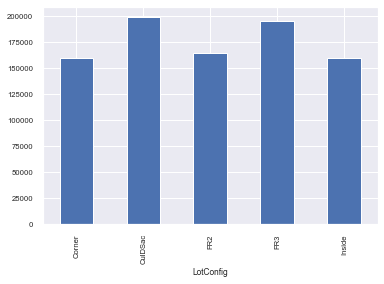

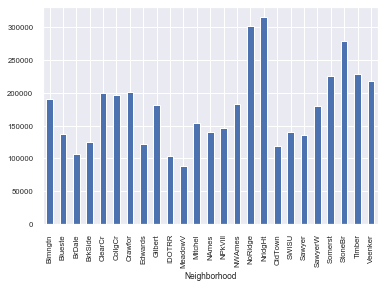

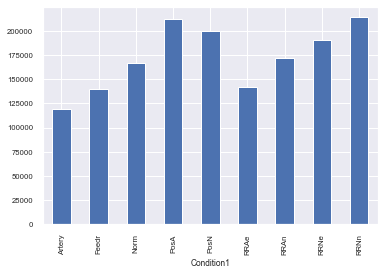

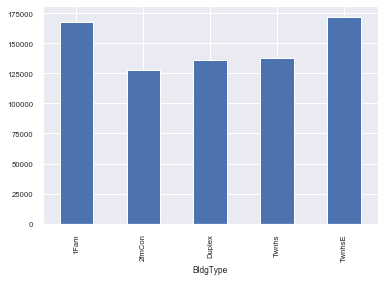

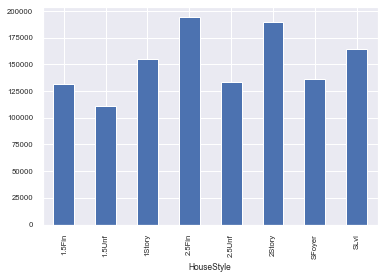

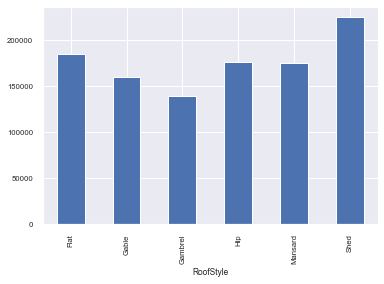

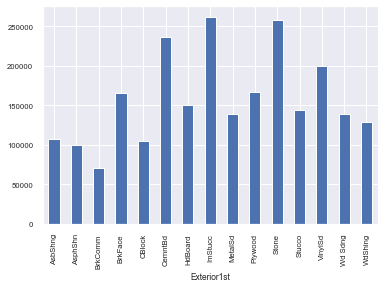

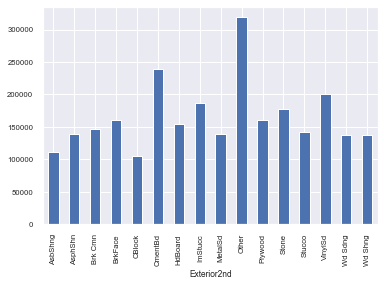

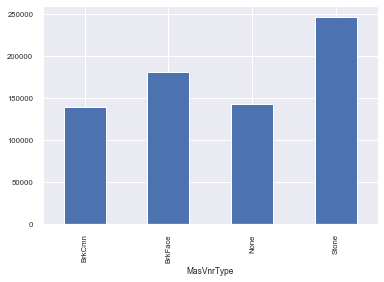

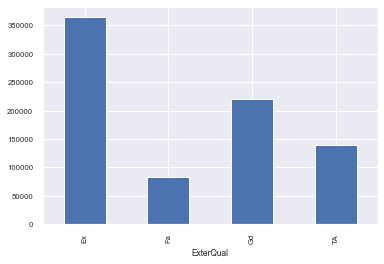

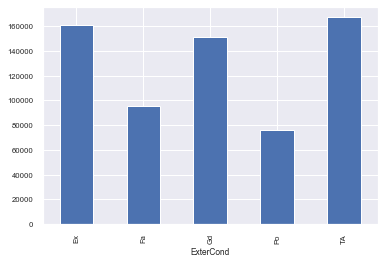

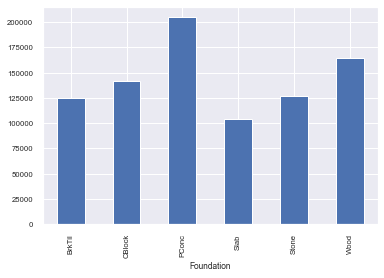

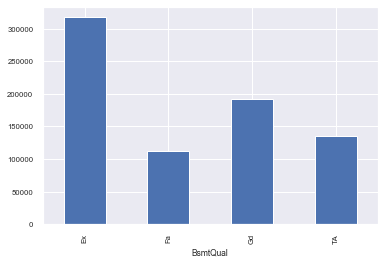

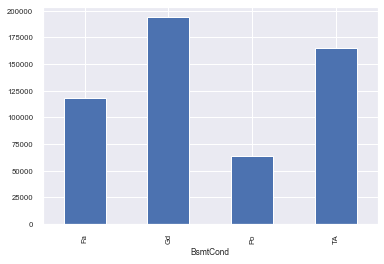

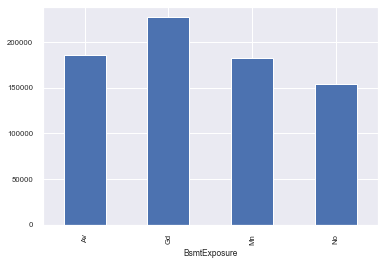

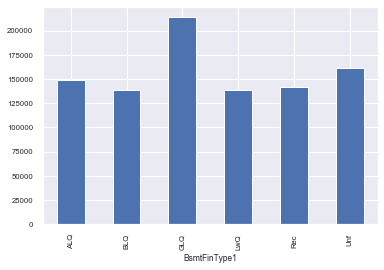

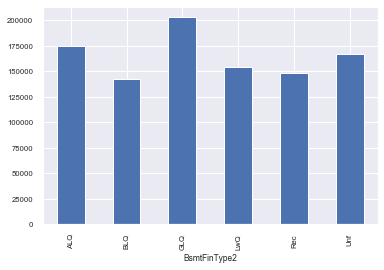

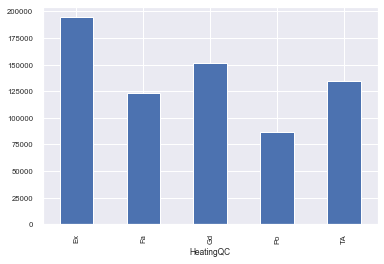

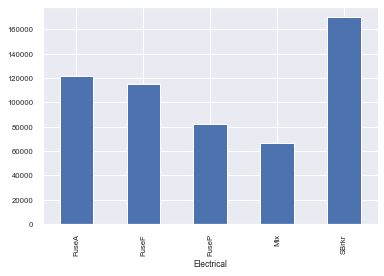

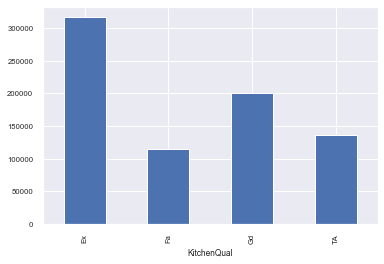

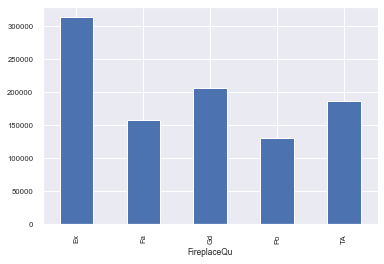

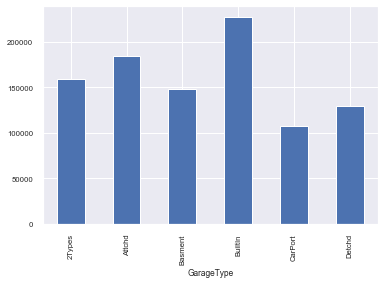

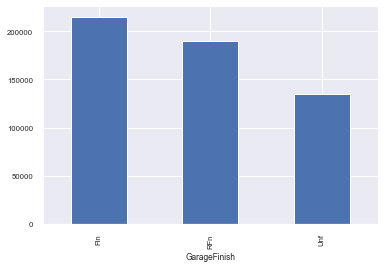

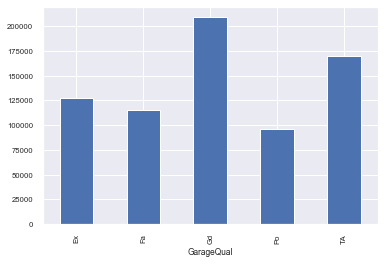

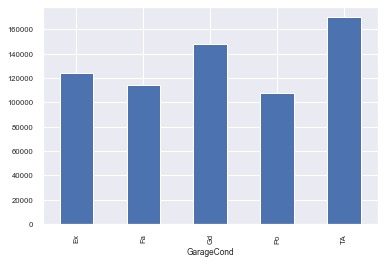

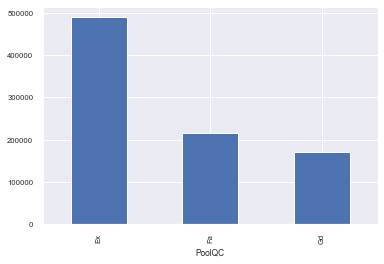

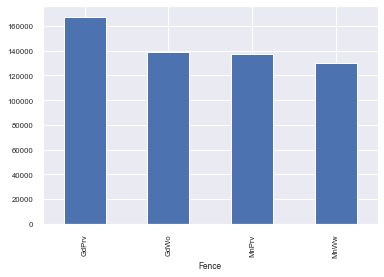

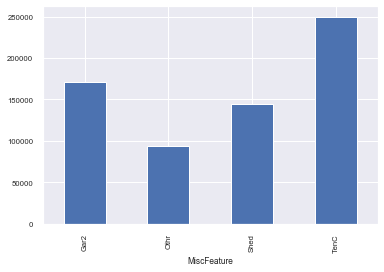

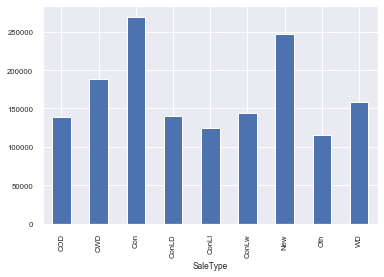

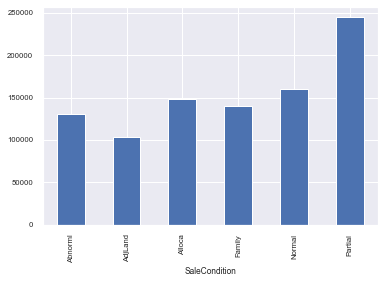

In [37]:
for i in categorical_features:
    train.groupby(i)['SalePrice'].median().plot.bar()
    plt.show()

## 4. Missing Value Imputation: <a id="4"></a>

In [38]:
#missing data 
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
age_garage,81,5.547945


In [39]:
train.PoolQC.value_counts(dropna=False)

NaN    1453
Gd        3
Ex        2
Fa        2
Name: PoolQC, dtype: int64

In [40]:
train.MiscFeature.value_counts(dropna=False)

NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [41]:
train.Alley.value_counts(dropna=False)

NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [42]:
train.Fence.value_counts(dropna=False)

NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [43]:
train.FireplaceQu.value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

Above 47% missing values are all categorical

In [44]:
#Getting the list of  columns with missing values greater than 47%
train_na_greater = list(missing_data[missing_data['Percent'] >47 ].index)
train_na_greater

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']

In [45]:
#Dropping the columns with more than 47% data missing
train.drop( train_na_greater, axis =1, inplace=True)

#Dropping Id column 
train.drop('Id', inplace=True, axis=1)

# dropping the yr_cols as these are converted to new features
train.drop(yr_cols, inplace= True, axis=1)

In [46]:
train.shape

(1460, 66)

In [47]:
#missing data updated
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
LotFrontage,259,17.739726
GarageFinish,81,5.547945
GarageQual,81,5.547945
age_garage,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtQual,37,2.534247
BsmtCond,37,2.534247


#### Imputation for Continuous columns  <br>
###### LotFrontage:  Linear feet of street connected to property

In [48]:
train.groupby('Neighborhood')['LotFrontage'].median()

Neighborhood
Blmngtn    43.0
Blueste    34.0
BrDale     34.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    74.0
Edwards    65.5
Gilbert    65.0
IDOTRR     60.0
MeadowV    34.0
Mitchel    73.0
NAmes      73.0
NPkVill    34.0
NWAmes     80.0
NoRidge    91.0
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     71.0
SawyerW    66.5
Somerst    73.5
StoneBr    61.5
Timber     85.0
Veenker    68.0
Name: LotFrontage, dtype: float64

In [49]:
## Replaced all missing values in LotFrontage by imputing the median value of each neighborhood. 
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.median()))

#### age_garage : Derived features depicting the age of the garage w.r.t. 2020 year

In [50]:
train.age_garage.describe()

count    1379.000000
mean       41.098622
std        23.584400
min        13.000000
25%        18.000000
50%        40.000000
75%        59.000000
max        90.000000
Name: age_garage, dtype: float64

In [51]:
# We saw that the mean and median are close to each other. Imputing by median.
train.age_garage.fillna(train.age_garage.median(), inplace=True)

#### MasVnrArea: Masonry veneer area in square feet

In [52]:
train.MasVnrArea.fillna(train.MasVnrArea.median(), inplace=True)

#### `Categorical Columns`
We encounter two reasons for missing values to occur:
1. Missing values due to some meaning 
2. Actual Missing values

Missing in these columns related to basement and Garage means these facilities are not present. So imputing these with a new category No_Basement and No_Garage respectively.

In [53]:
missing_no_bsmt= ['BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1']
for i in missing_no_bsmt:
    train[i] = train[i].fillna('No_Basement')

In [54]:
missing_no_gar =[ 'GarageQual', 'GarageCond', 'GarageFinish','GarageType']

for i in missing_no_gar:
    train[i] = train[i].fillna('No_Garage')

Missing in the below two columns are actually missing imputing with the mode values

In [55]:
#MasVnrType
print( train.MasVnrType.value_counts(dropna=False))
# NA is imputed with None 
train.MasVnrType.fillna('None', inplace=True)
#after imputing
print("*"*100)
print( train.MasVnrType.value_counts(dropna=False))

None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64
****************************************************************************************************
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [56]:
#Electrical
print( train.Electrical.value_counts(dropna=False))
# NA is imputed with mode value 
train.Electrical.fillna(train.Electrical.mode()[0], inplace=True)
#after imputing
print("*"*100)
print( train.Electrical.value_counts(dropna=False))

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64
****************************************************************************************************
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [57]:
#count of missing value in each attribute
sum = 0
for i in range(train.shape[1]):
    sum = sum + train.iloc[:,i].isnull().sum()
print(sum)   

0


### 5. Distribution of the target variable<a id="5"></a>

In [58]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

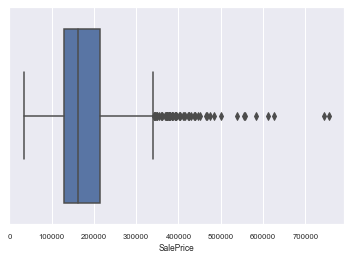

In [59]:
sns.boxplot(train.SalePrice)

There are many outliers in the SalePrice. Let's look at the distribution and skewness to better understand the dsiatribution of the target variable.

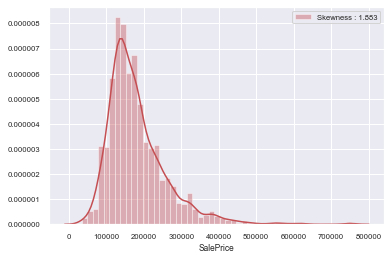

In [60]:
g = sns.distplot(train["SalePrice"], color="r", label="Skewness : %.3f"%(train["SalePrice"].skew()))
g = g.legend(loc="best")

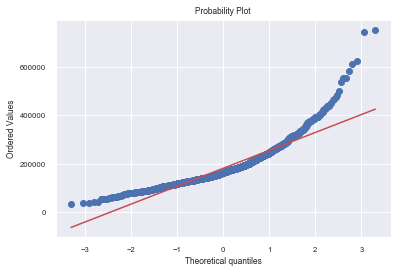

In [61]:
import pylab
import scipy.stats as stats
stats.probplot(train.SalePrice, dist="norm", plot=pylab)
pylab.show()

The target variable is right skewed. Such positive skewness is depicted with the value +1.883. Skewed target feature should be treated for normality before modelling, especially when the outliers are also important. Here the outliers are the high price houses which will be as important as the others.

In Case of positive skewness log transformation works.

In [1]:
#apply log transformation
train['Log_SalePrice'] = np.log(train['SalePrice'])

SyntaxError: invalid syntax (<ipython-input-1-9a4a11e8f62b>, line 2)

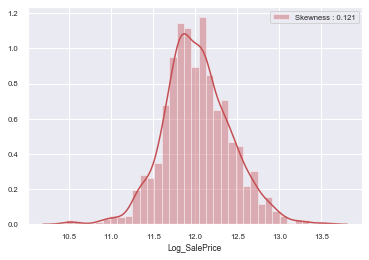

In [63]:
#transformed histo and normalprobablity plot

g = sns.distplot(train["Log_SalePrice"], color="r", label="Skewness : %.3f"%(train["Log_SalePrice"].skew()))
g = g.legend(loc="best")

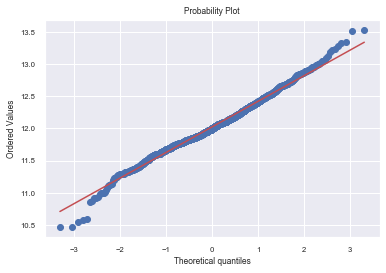

In [64]:
stats.probplot(train.Log_SalePrice, dist="norm", plot=pylab)
pylab.show()

Now the skewness dropped to 0.121 making the target variable distribution quite close to normal distribution.

### Creating new features

In [65]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']  

train['Total_fin_SF'] = train['BsmtFinSF1']+ train['BsmtFinSF2'] 
                                                              
                         
train['Total_Bathrooms'] = (train['FullBath'] 
                               + (0.5 * train['HalfBath']) 
                               + train['BsmtFullBath'] 
                               + (0.5 * train['BsmtHalfBath'])
                              )
                               

train['Total_porch_sf'] = train['OpenPorchSF']+ train['3SsnPorch'] + train['EnclosedPorch']+ train['ScreenPorch'] + train['WoodDeckSF']                     

In [66]:
train.shape

(1460, 71)

In [67]:
# Dropping SalePrice as Log_SalePrice is derived
train.drop("SalePrice", inplace=True, axis=1)

In [68]:
data_cleaned= train.copy()

# 6. Data Preparation <a id="6"></a>

In [69]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,age_house,age_remod,age_garage,age_sold,Log_SalePrice,TotalSF,Total_fin_SF,Total_Bathrooms,Total_porch_sf
0,60,RL,65.0,8450.0,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0.0,150,856.0,Ex,SBrkr,856.0,854.0,0,1710.0,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548.0,TA,TA,0,61.0,0.0,0,0,0,0,2,WD,Normal,17,17,17.0,12,12.247694,2566.0,706.0,3.5,61.0
1,20,RL,80.0,9600.0,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0.0,284,1262.0,Ex,SBrkr,1262.0,0.0,0,1262.0,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460.0,TA,TA,298,0.0,0.0,0,0,0,0,5,WD,Normal,44,44,44.0,13,12.109011,2524.0,978.0,2.5,298.0


#### Creating some categorical features to numeric ones

In [70]:

train.BsmtFinType1 = train.BsmtFinType1.map({'GLQ':6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ':4, 'Unf':1, 'No_Basement':0})
train.BsmtFinType2 = train.BsmtFinType2.map({'GLQ':6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ':4, 'Unf':1, 'No_Basement':0})
train.Electrical = train.Electrical.map({'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP':4, 'Mix':1})
train.GarageFinish = train.GarageFinish.map({'Fin': 3, 'RFn': 2, 'Unf':1, 'No_Garage':0})
train.ExterQual=train.ExterQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1})
train.ExterCond=train.ExterCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1})
train.BsmtQual=train.BsmtQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1, 'No_Basement':0})
train.BsmtExposure=train.BsmtExposure.map({'Gd':4, 'Av':3,'Mn':2,'No':1,'No_Basement':0})
train.BsmtCond=train.BsmtCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1, 'No_Basement':0})
train.KitchenQual=train.KitchenQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1})
train.GarageQual=train.GarageQual.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1, 'No_Garage':0})
train.GarageCond=train.GarageCond.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1, 'No_Garage':0})
train.HeatingQC=train.HeatingQC.map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa':4, 'Po':1})

In [71]:
dtype_changed= ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtCond', 'KitchenQual', 'GarageQual', 'GarageCond', 'HeatingQC', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageFinish']

In [72]:
for i in dtype_changed:
    train[i]=train[i].astype('int')

In [73]:
for i in dtype_changed:
    print(i, train[i].dtype)

ExterQual int32
ExterCond int32
BsmtQual int32
BsmtExposure int32
BsmtCond int32
KitchenQual int32
GarageQual int32
GarageCond int32
HeatingQC int32
BsmtFinType1 int32
BsmtFinType2 int32
Electrical int32
GarageFinish int32


In [74]:
len(dtype_changed)  #out of 44 we have made 13 as numeric now

13

### Creating dummy variables

In [75]:
# creating dummy variables for categorical variables
# subset all categorical variables
train_categorical = train.select_dtypes(include=['object'])
train_categorical.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,GarageType,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
1,20,RL,Reg,Lvl,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,MetalSd,None,CBlock,Attchd,WD,Normal
2,60,RL,IR1,Lvl,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal
3,70,RL,IR1,Lvl,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,BrkTil,Detchd,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,PConc,Attchd,WD,Normal


In [76]:
list(train_categorical.columns)

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition']

In [77]:
# convert into dummies
train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [78]:
# drop categorical variables 
train = train.drop(list(train_categorical.columns), axis=1)

# concat dummy variables with train
train = pd.concat([train, train_dummies], axis=1)

In [79]:
train.shape

(1460, 185)

In [80]:
X=  train.drop("Log_SalePrice", axis=1)
y= train['Log_SalePrice']

#### Splitting the data into train and test

In [81]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.75,
                                                    test_size = 0.25, random_state=100)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1095, 184), (365, 184), (1095,), (365,))

In [83]:
X_train.head(2)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,age_house,age_remod,age_garage,age_sold,TotalSF,Total_fin_SF,Total_Bathrooms,Total_porch_sf,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
774,107.0,14226.0,8,5,375.0,4,3,4,3,3,1,0,1,0.0,1468,1753.0,4,5,1831.25,0.0,0,1973.0,0,0,2,0,3,1,4,9,1,3,3,850.1,3,3,315,45.0,0.0,0,0,0,0,7,14,14,14.0,13,3584.25,0.0,2.0,360.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
92,80.0,13360.0,5,7,0.0,3,4,4,3,1,5,713,1,0.0,163,876.0,5,5,964.00,0.0,0,964.0,1,0,1,0,2,1,3,5,0,1,2,432.0,3,3,0,0.0,44.0,0,0,0,0,8,99,14,90.0,11,1840.00,713.0,2.0,44.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [84]:
cols= list(X_train.columns)
cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'age_house',
 'age_remod',
 'age_garage',
 'age_sold',
 'TotalSF',
 'Total_fin_SF',
 'Total_Bathrooms',
 'Total_porch_sf',
 'MSSubClass_160',
 'MSSubClass_180',
 'MSSubClass_190',
 'MSSubClass_20',
 'MSSubClass_30',
 'MSSubClass_40',
 'MSSubClass_45',
 'MSSubClass_50',
 'MSSubClass_60',
 'MSSubClass_70',
 'MSSubClass_75',
 'MSSubClass_80

#### Scaling the columns

In [85]:
#gtg the columns which are not dummies
numcol=cols[:52]
numcol

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'age_house',
 'age_remod',
 'age_garage',
 'age_sold',
 'TotalSF',
 'Total_fin_SF',
 'Total_Bathrooms',
 'Total_porch_sf']

In [86]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
X_train[numcol] = scal.fit_transform(X_train[numcol])
X_test[numcol] = scal.transform(X_test[numcol])

## 6. Feature Selection <a id="7"></a>

In [87]:
### Importing RFE 
from sklearn.feature_selection import RFE

In [88]:
X_train.shape

(1095, 184)

In [89]:
# Running RFE with the output number of the variable equal to 70
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 70)             # running RFE to select 70 features out of 184 features in the dataframe
rfe = rfe.fit(X_train, y_train)

In [90]:
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'age_house', 'TotalSF', 'Total_fin_SF',
       'Total_Bathrooms', 'Total_porch_sf', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_50', 'MSSubClass_70', 'MSSubClass_90',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandContour_Low', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm',
       'Condition1_RRAn', 'Condition1_RRNn', 'BldgType_2fmCon',
       'BldgType_Duplex', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace

In [91]:
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_CarPort',
       'GarageType_Detchd', 'SaleType_CWD', 'SaleType_ConLI', 'SaleType_ConLw',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=114)

In [92]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_test_rfe= X_test[col]

In [93]:
X_train_rfe.shape, X_test_rfe.shape

((1095, 70), (365, 70))

In [94]:
X_train_rfe.head(2)

,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,age_house,TotalSF,Total_fin_SF,Total_Bathrooms,Total_porch_sf,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_50,MSSubClass_70,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Low,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_MeadowV,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Condition1_Norm,Condition1_RRAn,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior1st_Stone,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,Foundation_Wood,GarageType_BuiltIn,GarageType_No_Garage,SaleType_Con,SaleType_ConLD,SaleType_New,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Normal,SaleCondition_Partial
774,1.377134,-0.538176,-1.062496,-0.332669,1.984915,2.016600,-0.814785,1.052259,-0.836480,-0.245115,0.795975,-0.762517,2.058030,0.036505,-0.394532,-0.120776,-0.280514,-1.184939,1.547711,-1.119848,-0.282636,1.452205,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
92,-0.795722,1.297657,0.672290,-0.332669,-0.521532,-0.565001,-0.814785,-1.199187,1.075724,-0.245115,-1.027440,-0.762517,-0.802119,-0.803934,0.450550,-0.120776,-0.280514,1.735056,-1.062518,0.574738,-0.282636,-0.922856,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 8. Model Building and Evaluation : Ridge and Lasso Regression <a id="8"></a>
Let's now try predicting Sale prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [95]:
# list of alphas to tune
#params = {'alpha':[0.001, 0.01, 0.1, 0.5,0.6, 1,1.5, 2, 2.5, 3, 3.5, 3.6, 3.8, 4,4.1, 4.2,4.3, 4.4, 4.5,4.6,4.7, 5, 6, 7, 10, 20,30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 180, 200, 250, 300,320, 330, 340,350, 360, 380,382,384,386, 390, 400,410, 420, 450, 480, 500,520, 540, 560 ,600, 700 ]}
params= {'alpha': [0.00001,0.00002, 0.00005,0.00008,0.0001,0.0002,0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001, 0.005,0.01, 0.1, 0.5, 1]}
ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params,                         
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 2e-05, 5e-05, 8e-05, 0.0001, 0.0002,
                                   0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
                                   0.0008, 0.0009, 0.001, 0.005, 0.01, 0.1, 0.5,
                                   1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [96]:
model_cv.best_estimator_   # looking at the Estimator that was chosen by the search 

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
model_cv.best_params_  #Parameter setting that gave the best results on the hold out data.

{'alpha': 0.5}

In [98]:
model_cv.best_score_  #Mean cross-validated score of the best_estimator

0.897814765482395

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results = cv_results[cv_results['param_alpha']]
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004999,0.001265,0.001004,0.000009,1e-05,{'alpha': 1e-05},0.891963,0.894867,0.884271,0.894853,0.920079,0.897207,0.012075,19,0.915874,0.915469,0.918841,0.914912,0.90911,0.914841,0.003172
1,0.004001,0.001096,0.001599,0.000490,2e-05,{'alpha': 2e-05},0.891963,0.894867,0.884271,0.894853,0.920080,0.897207,0.012075,18,0.915874,0.915469,0.918841,0.914912,0.90911,0.914841,0.003172


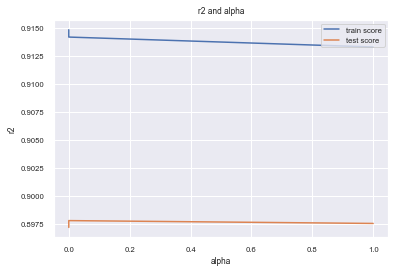

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [101]:
alpha_ridge = 0.5

ridge = Ridge(alpha=alpha_ridge)
ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 0.0775241 ,  0.06174221,  0.01586457, -0.00355799,  0.03712531,
        0.01765469,  0.01292708,  0.09957423,  0.01438066,  0.00354892,
        0.00218613,  0.00772406,  0.00629364,  0.00031517,  0.00383146,
        0.00488352,  0.00632284, -0.10642224,  0.03633315,  0.01462021,
        0.01416467,  0.00986475, -0.13825722, -0.05100443, -0.02629071,
        0.03038542,  0.05901158, -0.0460708 ,  0.27128697,  0.3118144 ,
        0.29982075,  0.2400048 ,  0.06636726,  0.05078293,  0.0717701 ,
        0.13694233, -0.06226698, -0.07976724,  0.10300013,  0.12269157,
        0.13579403,  0.10876889,  0.0647372 ,  0.0671901 ,  0.05442381,
        0.04577439, -0.02629071, -0.0460708 , -0.02874459, -0.16594518,
        0.09125924, -0.00766833, -0.1210079 , -0.06049458,  0.07670037,
       -0.02874459, -0.00766833,  0.09989389,  0.04105567,  0.        ,
       -0.15062717,  0.00391059, -0.0702122 ,  0.03928234,  0.16626997,
        0.05847191,  0.10446465,  0.05725778,  0.06330357,  0.05

In [102]:
# Making predictions
y_pred = ridge.predict(X_test_rfe)
from sklearn.metrics import r2_score
r2_alpha_ridge_train =model_cv.best_score_ 
r2_alpha_ridge_test= r2_score(y_test, y_pred)
print("R2 on train data:", r2_alpha_ridge_train)
print("R2 on test data:", r2_alpha_ridge_test)

R2 on train data: 0.897814765482395
R2 on test data: 0.8828604358220369


In [103]:
# Putting together the coefficient and their corrsponding variable names  
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"] = X_train_rfe.columns 
ridge_coefficient['Coeff with alpha'] = pd.Series(ridge.coef_) 
ridge_coefficient.head()

,Columns,Coeff with alpha
0,OverallQual,0.077524
1,OverallCond,0.061742
2,BsmtFinSF1,0.015865
3,BsmtFinSF2,-0.003558
4,TotalBsmtSF,0.037125


In [104]:
ridge_coefficient.sort_values('Coeff with alpha', ascending= False)

,Columns,Coeff with alpha
29,MSZoning_RH,0.311814
30,MSZoning_RL,0.299821
28,MSZoning_FV,0.271287
31,MSZoning_RM,0.240005
64,SaleType_ConLD,0.166270
35,Neighborhood_Crawfor,0.136942
40,Neighborhood_Somerst,0.135794
39,Neighborhood_NridgHt,0.122692
41,Neighborhood_StoneBr,0.108769
66,SaleCondition_AdjLand,0.104465


###  lasso

In [105]:
lasso= Lasso()
# cross validation
params= {'alpha': [0.00001, 0.0001, 0.0005, 0.0010, 0.002]}
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-05, 0.0001, 0.0005, 0.001, 0.002]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [106]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [107]:
model_cv.best_score_

0.8973927005707923

In [108]:
model_cv.best_params_

{'alpha': 0.0001}

In [109]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=0.01]
cv_results.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.096208,0.007223,0.002200,0.000400,1e-05,{'alpha': 1e-05},0.892033,0.894905,0.884063,0.895315,0.920551,0.897373,0.012273,2,0.915865,0.915462,0.918833,0.914903,0.909098,0.914832,0.003174
1,0.062556,0.009951,0.002002,0.000002,0.0001,{'alpha': 0.0001},0.891540,0.896005,0.881254,0.895899,0.922265,0.897393,0.013546,1,0.915098,0.914922,0.918018,0.914310,0.908030,0.914076,0.003284


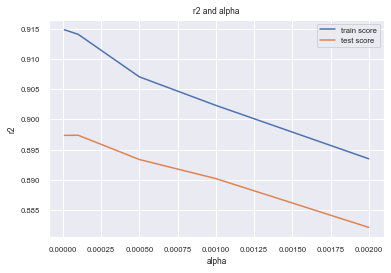

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)

#plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

the train and test r2 score are declining at a minute value of 0.0001. 

In [111]:
alpha_lasso =0.0001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [112]:
lasso.coef_

array([ 0.0791146 ,  0.06158513,  0.02914782, -0.        ,  0.03760272,
        0.01473197,  0.00984298,  0.1035679 ,  0.01540469,  0.00370195,
        0.00286642,  0.00811625,  0.00546585, -0.        ,  0.00352909,
        0.00436493,  0.00584549, -0.10633891,  0.03607805,  0.00096009,
        0.01231802,  0.01092718, -0.13673497, -0.03588135, -0.04661797,
        0.02958523,  0.05668918, -0.0870724 ,  0.29363523,  0.33058289,
        0.318699  ,  0.25786164,  0.06442241,  0.05025081,  0.06916224,
        0.13701752, -0.06158965, -0.07608742,  0.09801766,  0.11964448,
        0.13195471,  0.1025667 ,  0.06029732,  0.0655334 ,  0.04795588,
        0.01611732, -0.        , -0.0013133 , -0.        , -0.15506544,
        0.09022558, -0.        , -0.06466609, -0.        ,  0.03024759,
       -0.        , -0.        ,  0.04101921,  0.02123022,  0.        ,
       -0.1390564 ,  0.00210532, -0.07046335,  0.        ,  0.15916841,
        0.05852491,  0.07901454,  0.04263712,  0.05776923,  0.05

In [113]:
# Making predictions
y_pred = lasso.predict(X_test_rfe)
r2_alpha_lasso_train= model_cv.best_score_
r2_alpha_lasso_test =r2_score(y_test, y_pred)
print("R2 on train data:", r2_alpha_lasso_train)
print("R2 on test data:", r2_alpha_lasso_test)

R2 on train data: 0.8973927005707923
R2 on test data: 0.8839037662124024


In [114]:
# Putting together the coefficient and their corrsponding variable names  
lasso_coefficient = pd.DataFrame() 
lasso_coefficient["Columns"] = X_train_rfe.columns 
lasso_coefficient['Coeff with alpha'] = pd.Series(lasso.coef_) 

In [115]:
lasso_coefficient= lasso_coefficient[lasso_coefficient['Coeff with alpha'] !=0]
lasso_coefficient.sort_values('Coeff with alpha', ascending=False)[:5]

,Columns,Coeff with alpha
29,MSZoning_RH,0.330583
30,MSZoning_RL,0.318699
28,MSZoning_FV,0.293635
31,MSZoning_RM,0.257862
64,SaleType_ConLD,0.159168


In [116]:
list_top_5_lasso=['MSZoning_RH', 'MSZoning_RL', 'MSZoning_FV', 'MSZoning_RM', 'SaleType_ConLD']

In [117]:
lasso_coefficient.shape

(60, 2)

####  Lasso has selected 60 features out of 70

### 9. Model building with  double optimal alpha values for Ridge and Lasso Regression<a id="9"></a>

In [118]:
double_alpha_ridge = 2*alpha_ridge
ridge_1 = Ridge(alpha=double_alpha_ridge)
ridge_1.fit(X_train_rfe, y_train)
ridge_1.coef_

array([ 0.07902376,  0.06214532,  0.01576965, -0.00336999,  0.0367126 ,
        0.01860736,  0.01344903,  0.0981296 ,  0.01454258,  0.00332172,
        0.0023016 ,  0.00766843,  0.0063107 ,  0.00035492,  0.0038603 ,
        0.00472559,  0.00625182, -0.10656007,  0.03691973,  0.01457382,
        0.0143015 ,  0.00984773, -0.13496567, -0.04825256, -0.024825  ,
        0.02979328,  0.06011428, -0.04417342,  0.21275801,  0.24873983,
        0.24437301,  0.18350096,  0.06339318,  0.05197406,  0.07184584,
        0.13532663, -0.06078369, -0.07479824,  0.09955931,  0.11897094,
        0.13493681,  0.10302745,  0.06121345,  0.06642901,  0.05185756,
        0.03789593, -0.024825  , -0.04417342, -0.02565771, -0.13735194,
        0.09048561, -0.00560708, -0.0929535 , -0.04255473,  0.0631861 ,
       -0.02565771, -0.00560708,  0.07075231,  0.03589544,  0.        ,
       -0.13137303,  0.00452249, -0.07010761,  0.03425739,  0.14242882,
        0.05835276,  0.0906604 ,  0.04516257,  0.06324565,  0.05

In [119]:
# Making predictions
y_pred = ridge_1.predict(X_test_rfe)
r2_double_alpha_ridge_test= r2_score(y_test, y_pred)


In [120]:
print("**********Train data*******")
print("r2 with alpha", r2_alpha_ridge_train)
print("r2 with double alpha", model_cv.best_score_)
print("***********Test data********")
print("r2 with alpha", r2_alpha_ridge_test)
print("r2 with double alpha", r2_double_alpha_ridge_test)

**********Train data*******
r2 with alpha 0.897814765482395
r2 with double alpha 0.8973927005707923
***********Test data********
r2 with alpha 0.8828604358220369
r2 with double alpha 0.8835551467249199


In [121]:
# Putting together the coefficient and their corrsponding variable names  
ridge_coefficient_1 = pd.DataFrame() 
ridge_coefficient_1["Columns"] = X_train_rfe.columns 
ridge_coefficient_1['Coeff with double alpha'] = pd.Series(ridge_1.coef_) 
ridge_coefficient_1.head()

,Columns,Coeff with double alpha
0,OverallQual,0.079024
1,OverallCond,0.062145
2,BsmtFinSF1,0.015770
3,BsmtFinSF2,-0.003370
4,TotalBsmtSF,0.036713


In [122]:
ridge_coefficient_1.sort_values('Coeff with double alpha', ascending= False)

,Columns,Coeff with double alpha
29,MSZoning_RH,0.248740
30,MSZoning_RL,0.244373
28,MSZoning_FV,0.212758
31,MSZoning_RM,0.183501
64,SaleType_ConLD,0.142429
35,Neighborhood_Crawfor,0.135327
40,Neighborhood_Somerst,0.134937
39,Neighborhood_NridgHt,0.118971
41,Neighborhood_StoneBr,0.103027
38,Neighborhood_NoRidge,0.099559


In [123]:
ridge_coefficient['Coeff with double alpha']= ridge_coefficient_1['Coeff with double alpha']
ridge_coefficient.sort_values('Coeff with alpha', ascending=False)[:5]

,Columns,Coeff with alpha,Coeff with double alpha
29,MSZoning_RH,0.311814,0.248740
30,MSZoning_RL,0.299821,0.244373
28,MSZoning_FV,0.271287,0.212758
31,MSZoning_RM,0.240005,0.183501
64,SaleType_ConLD,0.166270,0.142429


###  lasso

In [124]:
double_alpha_lasso =alpha_lasso *2

lasso_1 = Lasso(alpha=double_alpha_lasso)
        
lasso_1.fit(X_train_rfe, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
# Making predictions
y_pred = lasso_1.predict(X_test_rfe)
r2_double_alpha_lasso_test = r2_score(y_test, y_pred)

In [126]:
print("**********Train data*******")
print("r2 with alpha", r2_alpha_lasso_train)
print("r2 with double alpha", model_cv.best_score_)
print("***********Test data********")
print("r2 with alpha", r2_alpha_lasso_test)
print("r2 with double alpha", r2_double_alpha_lasso_test)

**********Train data*******
r2 with alpha 0.8973927005707923
r2 with double alpha 0.8973927005707923
***********Test data********
r2 with alpha 0.8839037662124024
r2 with double alpha 0.8849804660517957


In [127]:
# Putting together the coefficient and their corrsponding variable names  
lasso_coefficient_1 = pd.DataFrame() 
lasso_coefficient_1["Columns"] = X_train_rfe.columns 
lasso_coefficient_1['Coeff with double alpha'] = pd.Series(lasso_1.coef_) 
lasso_coefficient= lasso_coefficient[lasso_coefficient['Coeff with alpha'] !=0]
lasso_coefficient.sort_values('Coeff with alpha', ascending=False)[:5]

,Columns,Coeff with alpha
29,MSZoning_RH,0.330583
30,MSZoning_RL,0.318699
28,MSZoning_FV,0.293635
31,MSZoning_RM,0.257862
64,SaleType_ConLD,0.159168


In [128]:
lasso_coefficient_1= lasso_coefficient_1[lasso_coefficient_1['Coeff with double alpha'] !=0]
lasso_coefficient_1.sort_values('Coeff with double alpha', ascending=False)[:5]

,Columns,Coeff with double alpha
30,MSZoning_RL,0.242734
29,MSZoning_RH,0.242079
28,MSZoning_FV,0.212614
31,MSZoning_RM,0.178472
35,Neighborhood_Crawfor,0.134528


In [129]:
lasso_coefficient_1.shape

(56, 2)

In [130]:
df_merge = pd.merge(lasso_coefficient, lasso_coefficient_1, how ='left', on= 'Columns' )
df_merge.sort_values('Coeff with alpha',ascending=False)[:5]

,Columns,Coeff with alpha,Coeff with double alpha
27,MSZoning_RH,0.330583,0.242079
28,MSZoning_RL,0.318699,0.242734
26,MSZoning_FV,0.293635,0.212614
29,MSZoning_RM,0.257862,0.178472
54,SaleType_ConLD,0.159168,0.117052


### 10. Dropping the top5 variables from the lasso model and rebuilding the model <a id="10"></a>

In [131]:
list_top_5_lasso

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_FV', 'MSZoning_RM', 'SaleType_ConLD']

In [132]:
X_train_rfe.shape, X_test_rfe.shape

((1095, 70), (365, 70))

In [133]:
#dropping the the top 5 variables from the traina and test data
X_train_rfe.drop(list_top_5_lasso, inplace=True, axis=1)
X_test_rfe.drop(list_top_5_lasso, inplace=True, axis=1)

In [134]:
X_train_rfe.shape, X_test_rfe.shape  #doing lasso reg from 65 features

((1095, 65), (365, 65))

In [135]:
alpha_lasso =0.0001

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [136]:
# Making predictions
y_pred = lasso.predict(X_test_rfe)
r2_new_alpha_lasso =r2_score(y_test, y_pred)
print(r2_new_alpha_lasso)

0.880226140622647


In [137]:
# the top variables now:
# Putting together the coefficient and their corrsponding variable names  
lasso_coefficient_new = pd.DataFrame() 
lasso_coefficient_new["Columns"] = X_train_rfe.columns 
lasso_coefficient_new['Coeff with alpha'] = pd.Series(lasso.coef_) 
#taking out the features with non zero coeffiecients
lasso_coefficient_new= lasso_coefficient_new[lasso_coefficient_new['Coeff with alpha'] !=0]
lasso_coefficient_new.sort_values('Coeff with alpha', ascending=False)[:5]

,Columns,Coeff with alpha
31,Neighborhood_Crawfor,0.156105
36,Neighborhood_Somerst,0.126154
35,Neighborhood_NridgHt,0.119262
37,Neighborhood_StoneBr,0.110357
7,GrLivArea,0.100571


In [138]:
lasso_coefficient_new.shape  # shape of the new df to get an idea about the count of the colums

(54, 2)